# Hx vs Hy Plots

In [1]:
%reset -f
import ROOT, numpy
import traceback
from datetime import datetime

from MyCommonAnalysisFunction_richcap import *

import math
import array
import copy

ROOT.TH1.AddDirectory(0)
ROOT.gStyle.SetTitleOffset(1.3,'y')

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

print(color.BOLD, "\nStarting RG-A SIDIS Analysis\n", color.END)


# getting current date
datetime_object_full = datetime.now()
# print(datetime_object)

startMin_full = datetime_object_full.minute
startHr_full = datetime_object_full.hour

if(datetime_object_full.minute <10):
    timeMin_full = "".join(["0", str(datetime_object_full.minute)])
else:
    timeMin_full = str(datetime_object_full.minute)

    
Date_Day = "".join(["\nStarted running on ", color.BOLD, str(datetime_object_full.month), "-", str(datetime_object_full.day), "-", str(datetime_object_full.year), color.END, " at "])
# printing current time
if(datetime_object_full.hour > 12 and datetime_object_full.hour < 24):
    print("".join([Date_Day, color.BOLD, str((datetime_object_full.hour)-12), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour < 12 and datetime_object_full.hour > 0):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " a.m.", color.END]))
if(datetime_object_full.hour == 12):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour == 0 or datetime_object_full.hour == 24):
    print("".join([Date_Day, color.BOLD, "12:", str(timeMin_full), " a.m.", color.END]))
print("")

.

.

.

## Load RDataFrames

In [7]:
def FileLocation(FileName, Datatype):
    # location = "/lustre19/expphy/volatile/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/"
    location = "Histo_Files_ROOT/"
    if(str(Datatype) == 'rdf'):
        file = "".join(["REAL_Data/SIDIS_epip_Data_REC_", str(FileName), ".root"])
    if(str(Datatype) == 'mdf'):
        file = "".join(["Matching_REC_MC/SIDIS_epip_MC_Matched_", str(FileName), ".root"])
    if(str(Datatype) == 'gdf'):
        file = "".join(["GEN_MC/SIDIS_epip_MC_GEN_", str(FileName), ".root"])
    loading = "".join([location, file])
    return loading





################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################

Smearing_Options = "no_smear"

Common_Name = "Pass_2_5D_Unfold_Test_V7_All"
# Common_Name = "5D_Unfold_Test_V7_All"

Common_Name = "Pass_2_New_Sector_Cut_Test_V3_All"

Common_Name = "Pass_2_New_Sector_Cut_Test_V4_All"
Common_Name = "Pass_2_New_Sector_Cut_Test_V6_All"
Common_Name = "Pass_2_New_Sector_Cut_Test_V8_All"

Common_Name = "Pass_2_New_Sector_Cut_Test_V9_All"


Standard_Histogram_Title_Addition = ""

Pass_Version = "Pass 2" if("Pass_2" in Common_Name) else "Pass 1"
if(Pass_Version not in [""]):
    if(Standard_Histogram_Title_Addition not in [""]):
        Standard_Histogram_Title_Addition = f"{Pass_Version} - {Standard_Histogram_Title_Addition}"
    else:
        Standard_Histogram_Title_Addition = Pass_Version


print(f"{color.BBLUE}\nRunning with {Pass_Version} files\n\n{color.END}")
        
        
# Use unique file(s) for one of datatypes? (If so, set the following if(...) conditions to 'False')

##################################
##   Real (Experimental) Data   ##
##################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Real (Experimental) Data...\n", color.END]))
# if(False):
    REAL_File_Name = Common_Name
#     REAL_File_Name = REAL_File_Name.replace("_V9_All", "_V11_5203")
else:
    REAL_File_Name = "Pass_2_5D_Unfold_Test_V7_All" if(Pass_Version in ["Pass 2"]) else "5D_Unfold_Test_V7_All"
##################################
##   Real (Experimental) Data   ##
##################################

########################################
##   Reconstructed Monte Carlo Data   ##
########################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Reconstructed Monte Carlo Data...\n", color.END]))
if(False):
    MC_REC_File_Name = Common_Name
else:
    MC_REC_File_Name = "Unsmeared_Pass_2_5D_Unfold_Test_V7_All"      if(Smearing_Options in ["no_smear"]) else "Pass_2_5D_Unfold_Test_V7_All"
#     MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V1_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V1_All"
#     MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V2_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V2_All"
#     MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V3_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V3_All"
    MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V4_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V4_All"
    MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V6_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V6_All"
    MC_REC_File_Name = f"Unsmeared_{Common_Name}" if(Smearing_Options in ["no_smear"]) else Common_Name
#     MC_REC_File_Name = MC_REC_File_Name.replace("_V9_All", "_V11_All")
    if(Pass_Version not in ["Pass 2"]):
        MC_REC_File_Name = MC_REC_File_Name.replace("Pass_2_", "")
########################################
##   Reconstructed Monte Carlo Data   ##
########################################

####################################
##   Generated Monte Carlo Data   ##
####################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Generated Monte Carlo Data...\n", color.END]))
if(False):
    MC_GEN_File_Name = Common_Name
else:
    MC_GEN_File_Name = "Gen_Cuts_V2_Fixed_All"
    MC_GEN_File_Name = "Pass_2_New_Sector_Cut_Test_V9_All"
####################################
##   Generated Monte Carlo Data   ##
####################################


################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################





################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
try:
    rdf = ROOT.TFile(str(FileLocation(str(REAL_File_Name), "rdf")), "READ")
    print("".join(["The total number of histograms available for the", color.BLUE,  " Real (Experimental) Data",       color.END, " in       '", color.BOLD, REAL_File_Name,   color.END, "' is ", color.BOLD, str(len(rdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    mdf = ROOT.TFile(str(FileLocation(str(MC_REC_File_Name), "mdf")), "READ")
    print("".join(["The total number of histograms available for the", color.RED,   " Reconstructed Monte Carlo Data", color.END, " in '",       color.BOLD, MC_REC_File_Name, color.END, "' is ", color.BOLD, str(len(mdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    gdf = ROOT.TFile(str(FileLocation(str(MC_GEN_File_Name), "gdf")), "READ")
    print("".join(["The total number of histograms available for the", color.GREEN, " Generated Monte Carlo Data",     color.END, " in     '",   color.BOLD, MC_GEN_File_Name, color.END, "' is ", color.BOLD, str(len(gdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'gdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################


print(f"{color.BOLD}\nPass Version in use is:{color.END}{color.BLUE} {Pass_Version}{color.END_B}\n\n\nDone Loading RDataFrame files...\n\n{color.END}")


Running with Pass 2 files



Not using the common file name for the Reconstructed Monte Carlo Data...


Not using the common file name for the Generated Monte Carlo Data...

The total number of histograms available for the Real (Experimental) Data in       'Pass_2_New_Sector_Cut_Test_V9_All' is 690
The total number of histograms available for the Reconstructed Monte Carlo Data in 'Unsmeared_Pass_2_New_Sector_Cut_Test_V9_All' is 1596
The total number of histograms available for the Generated Monte Carlo Data in     'Pass_2_New_Sector_Cut_Test_V9_All' is 416

Pass Version in use is: Pass 2


Done Loading RDataFrame files...




.

.

.

In [5]:
for mdf_name in rdf.GetListOfKeys():
    if("(Var-D1='Hx'" in str(mdf_name.GetName())):
#     if("(Var-D1='Hx_pip'" in str(mdf_name.GetName())):
#     if("pipsec" in str(mdf_name.GetName())):
#     if("Normal_3D" in str(mdf_name.GetName())):
        print(mdf_name.GetName() + "\n")
        
print("Done")

((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Hx'-[NumBins=800, MinBin=-400, MaxBin=400]), (Var-D2='Hy'-[NumBins=800, MinBin=-400, MaxBin=400]))

((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Hx'-[NumBins=800, MinBin=-400, MaxBin=400]), (Var-D2='Hy'-[NumBins=800, MinBin=-400, MaxBin=400]))

((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS_eS1o'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Hx'-[NumBins=800, MinBin=-400, MaxBin=400]), (Var-D2='Hy'-[NumBins=800, MinBin=-400, MaxBin=400]))

Done


In [4]:
# try:
#     Run_REAL_Search = False
# #     Run_REAL_Search = True

#     Run_MC_REC_Search = False
#     Run_MC_REC_Search = not True

#     Run_MC_GEN_Search = False
# #     Run_MC_GEN_Search = True
    
#     def Search_Condition_Common(name="name"):
#         # if((str(name).find("Title: #splitline{")) != -1):
#         #     name = str(name).replace(str(name).replace(str(name)[:(str(name).find("Title: #splitline{"))], ""), "")
#         name = name.GetName()
        
#         out_list = [True]
        
#         out_list.append("Var-D1='elth'" in str(name))
#         out_list.append("Var-D2='el'"   in str(name))
#         out_list.append("no_cut"    not in str(name))
        
# #         out_list.append("Var-D1='Q2'" in str(name))
# #         out_list.append("Background" in str(name))
# #         out_list.append("Multi"      in str(name))
# # #         out_list.append("Combine"    in str(name))
# #         out_list.append("no_cut" not in str(name))
# #         out_list.append("2D"         in str(name))
# # #         out_list.append("'xB'"     in str(name))
# #         out_list.append("'y_smeared'"         in str(name))
# #         out_list.append("Q2-y-Bin=5" in str(name))
# #         out_list.append("smear"      in str(name))

# #         out_list.append("Q2-y-Bin=17" in str(name))
# #         out_list.append("phi_t" in str(name))
# #         out_list.append("pipsec" in str(name))
# #         out_list.append("'el'" in str(name))

# #         out_list.append("2D" not in str(name))
# #         out_list.append("Multi_Dim_Q2_phi_t" in str(name))
# #         out_list.append("Multi_Dim_" in str(name))
# #         out_list.append("4D" in str(name))
# #         out_list.append("Multi_Dim_Q2_phi_t" in str(name))

# #         out_list.append("no_cut" not in str(name))
# # #         out_list.append("Multi_Dim_z_pT_Bin_y_bin_phi_t" in str(name))
# #         out_list.append("Multi_Dim_" in str(name))
# #         out_list.append("Gen_MM_Cut" not in str(name))
        
# #         out_list.append("Multi_Dim_z_pT_Bin_y_bin_phi_t" not in str(name))
# #         out_list.append("Multi_Dim_Q2_y_Bin_phi_t"       not in str(name))
    
# #         out_list.append("Q2-y-Bin=All"             in str(name))
# #         out_list.append("'Response_Matrix_Normal'" in str(name))
        
#         out = False not in out_list
# #         out = True
# #         out = ("Gen_MM_Cut" not in str(name)) and ("2D" not in str(name))
# #         out = ("2D" not in str(name))
# #         if(out):
# #             print("out_list =", out_list, "\nout =", out)
# #             print("name =", name, "\n")
#         return out

#     if(True in [Run_REAL_Search, Run_MC_REC_Search, Run_MC_GEN_Search]):
#         if(Run_REAL_Search):
#             print("".join([color.BOLD, """

# --------------------------------------------------------------------------------------------------------------------------------------------------------
#         Checking the Real (Experimental) Data files:
#         """, color.END]))
#             REAL_Search_Count = 0
#             REAL_Search_Condition = True
#             for rdf_name in rdf.GetListOfKeys():
#                 # REAL_Search_Condition = ("Response" in str(rdf_name) and "phi" in str(rdf_name) and "1D" in str(rdf_name))
# #                 REAL_Search_Condition = ("Normal_2D" in str(rdf_name) and "cut_Complete_SIDIS" in str(rdf_name))
#                 # REAL_Search_Condition = ("Normal_2D" not in str(rdf_name) and "cut_Complete_EDIS" in str(rdf_name))
# #                 REAL_Search_Condition = ("Response_Matrix" in str(rdf_name))
#                 if(REAL_Search_Condition and Search_Condition_Common(name=rdf_name)):
#                     REAL_Search_Count += 1
# #                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str(type(rdf.Get(rdf_name.GetName()))), color.END]))
#                     # print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str((rdf.Get(rdf_name.GetName()))), color.END]))
# #                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), color.END]))
#                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), color.END, color.BOLD, "\n\t-----   object type: ", color.BLUE, str(type(rdf.Get(rdf_name.GetName()))), color.END]))
#             print("".join([color.BOLD, """
#         TOTAL REAL = """, str(REAL_Search_Count), """
#         Done checking the Real (Experimental) Data files
# --------------------------------------------------------------------------------------------------------------------------------------------------------

#         """, color.END]))
#         else:
#             print("Not Checking the Real (Experimental) Data files...")

#         if(Run_MC_REC_Search):
#             print("".join([color.BOLD, """

# --------------------------------------------------------------------------------------------------------------------------------------------------------
#         Checking the Reconstructed Monte Carlo Data files:
#         """, color.END]))
#             MC_REC_Search_Count = 0
#             for mdf_name in mdf.GetListOfKeys():
#                 MC_REC_Search_Condition = True
# #                 MC_REC_Search_Condition = ("Normal_2D" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name))
# #                 MC_REC_Search_Condition = ("(Smear-Type='')" in str(mdf_name) and "[Q2-y-Bin=All" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name))
# #                 MC_REC_Search_Condition = ("Response_Matrix_Normal" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name) and "'xB'" in str(mdf_name))
# #                 MC_REC_Search_Condition = ("Response_Matrix_Normal" in str(mdf_name) and "Combined_phi_t_Q2" in str(mdf_name))
#                 # MC_REC_Search_Condition = ("Mom_Cor_Code" in str(mdf_name))# and "phi_t" in str(mdf_name) and "no_cut" in str(mdf_name))
#                 if(MC_REC_Search_Condition and Search_Condition_Common(name=mdf_name)):
#                     MC_REC_Search_Count += 1
#                     # print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\t", color.RED, str(mdf_name.GetName()), "   -----   object type: ", str(type(mdf.Get(mdf_name.GetName()))), color.END]))
#                     # print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\t", color.RED, str(mdf_name.GetName()), color.END]))
#                     print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\n\t", color.RED, str(mdf_name.GetName()), color.END, color.BOLD, "\n\t object type: ", color.RED, str(type(mdf.Get(mdf_name.GetName()))), color.END]))
#                     print("mdf_name.GetTitle() =", mdf_name.GetTitle())
# #                     print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\n\t", color.RED, str(mdf_name.GetName()), color.END]))
#             print("".join([color.BOLD, """
#         TOTAL MC REC = """, str(MC_REC_Search_Count), """
#         Done checking the Reconstructed Monte Carlo Data files
# --------------------------------------------------------------------------------------------------------------------------------------------------------

#         """, color.END]))
#         else:
#             print("Not Checking the Reconstructed Monte Carlo Data files...")

#         if(Run_MC_GEN_Search):
#             print("".join([color.BOLD, """

# --------------------------------------------------------------------------------------------------------------------------------------------------------
#         Checking the Generated Monte Carlo Data files:
#         """, color.END]))
#             MC_GEN_Search_Count = 0
#             MC_GEN_Search_Condition = True
#             for gdf_name in gdf.GetListOfKeys():
#                 # MC_GEN_Search_Condition = ("Response" in str(gdf_name) and "phi" in str(gdf_name) and "1D" in str(gdf_name))
#                 if(MC_GEN_Search_Condition and Search_Condition_Common(name=gdf_name)):
#                     MC_GEN_Search_Count += 1
#                     # print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), "   -----   object type: ", str(type(gdf.Get(gdf_name.GetName()))), color.END]))
#                     print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), color.END]))
# #                     print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), "".join(["\n\t-----   object type: ", str((gdf.Get(gdf_name.GetName())))]) if("0x(nil)" in str((gdf.Get(str(gdf_name.GetName()))))) else "\n\tGOOD", color.END]))
#             print("".join([color.BOLD, """
#         TOTAL MC GEN = """, str(MC_GEN_Search_Count), """
#         Done checking the Generated Monte Carlo Data files
# --------------------------------------------------------------------------------------------------------------------------------------------------------

#         """, color.END]))
#         else:
#             print("Not Checking the Generated Monte Carlo Data files...")

#     else:
#         print("Not checking any of the data files...")

#     print("\nDONE CHECKING FILES\n")
# except:
#     print("".join([color.RED, color.BOLD, "ERROR CHECKING FILES\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

.

.

.

## Making Plots

Histo_mdf_Title = #splitline{#splitline{Monte Carlo Data (REC) x_{DC} vs y_{DC} vs DC Detector Layer}{Pass Version: #color[4]{Pass 2}}}{Cut: Complete Set of SIDIS Cuts}
Standard_Histogram_Title_Addition = Pass 2
Done
Histo_mdf_Total = 12141566.0
Histo_rdf_Total = 57902574.0


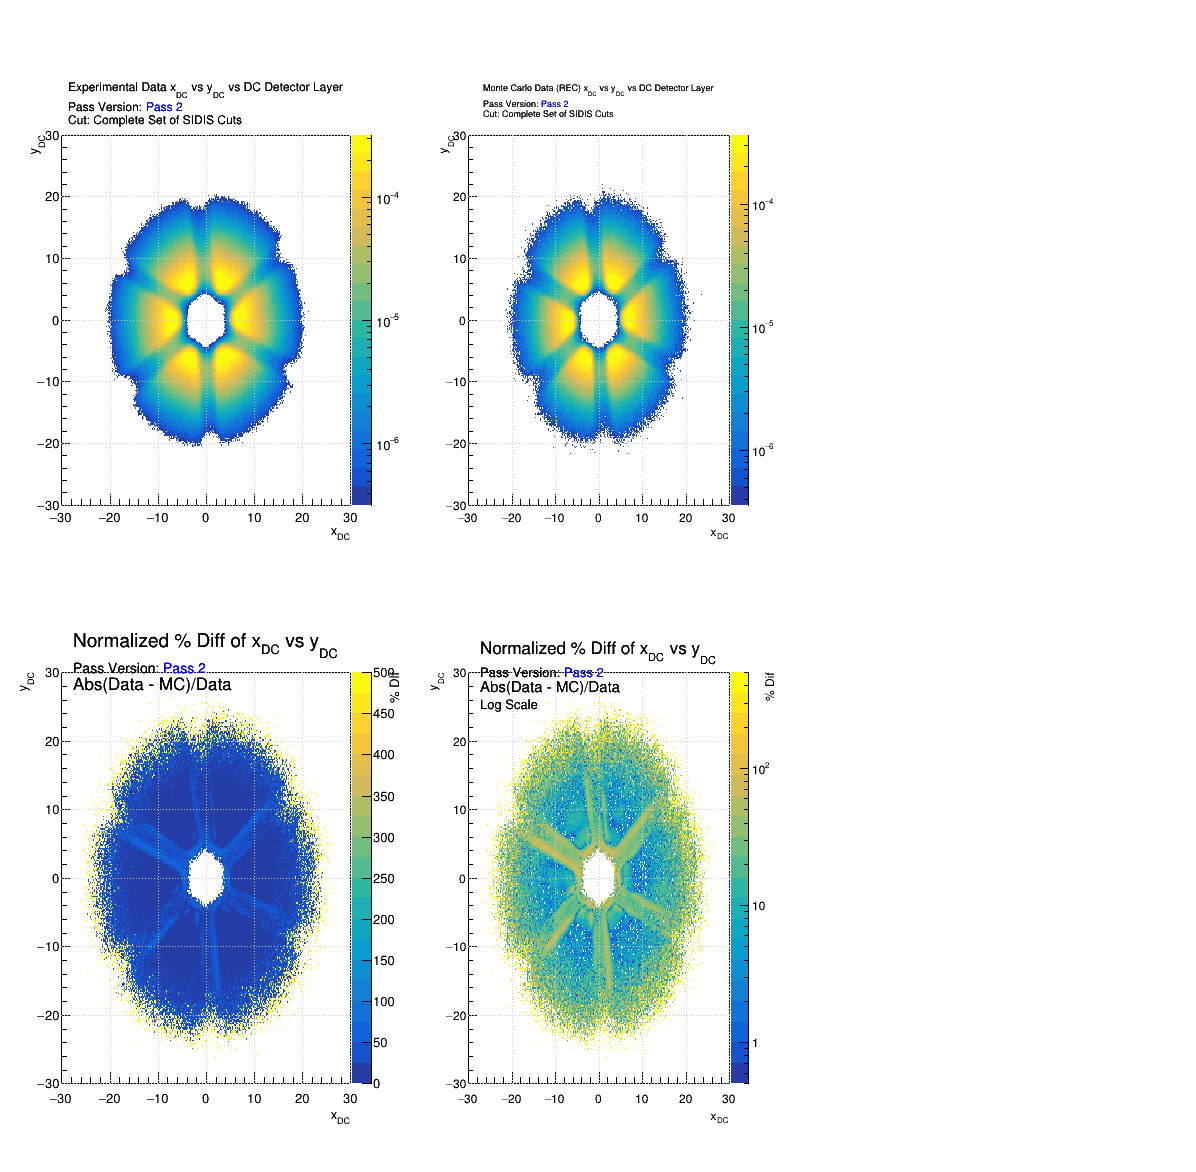

In [13]:
cut = "cut_Complete_SIDIS_eS1o"
cut = "cut_Complete_SIDIS"

# For Hx and Hy
Variable, NumBins, MinBin, MaxBin = "", 800, -400, 400
# For Hx_pip and Hy_pip
Variable, NumBins, MinBin, MaxBin = "_pip", 600, -60, 60

# Variable, NumBins, MinBin, MaxBin = "_pip_rot", 600, -200, 100

Histo_Name_mdf =  """((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Hx'-[NumBins=800, MinBin=-400, MaxBin=400]), (Var-D2='Hy'-[NumBins=800, MinBin=-400, MaxBin=400]))"""
Histo_Name_mdf = f"""((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Hx{Variable}'-[NumBins={NumBins}, MinBin={MinBin}, MaxBin={MaxBin}]), (Var-D2='Hy{Variable}'-[NumBins={NumBins}, MinBin={MinBin}, MaxBin={MaxBin}]))"""

if(Variable not in [""]):
    Histo_Name_mdf = "".join([f"""((Histo-Group='Normal_3D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Hx{Variable}'-[NumBins={NumBins}, MinBin={MinBin}, MaxBin={MaxBin}]), (Var-D2='Hy{Variable}'-[NumBins={NumBins}, MinBin=""", str(MinBin) if(MinBin not in [-200]) else "-150", ", MaxBin=", str(MaxBin) if(MinBin not in [-200]) else "150", """]), (Var-D3='layer_DC'-[NumBins=38, MinBin=-0.5, MaxBin=37.5]))"""])

# Histo_Name_mdf = str(Histo_Name_mdf.replace("mdf", "mdf")).replace("cut_Complete_SIDIS", "no_cut")
Histo_Name_rdf = str(Histo_Name_mdf.replace("mdf", "rdf"))


# Variable, NumBins, MinBin, MaxBin = "_pip_rot", 600, -200, 100
# # Histo_Name_rdf = "".join([f"""((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Hx{Variable}'-[NumBins={NumBins}, MinBin={MinBin}, MaxBin={MaxBin}]), (Var-D2='Hy{Variable}'-[NumBins={NumBins}, MinBin=""", str(MinBin) if(MinBin not in [-200]) else "-150", ", MaxBin=", str(MaxBin) if(MinBin not in [-200]) else "150", """]), (Var-D3='layer_DC'-[NumBins=11, MinBin=-0.5, MaxBin=10.5]))"""])
# Histo_Name_rdf = "".join([f"""((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Hy{Variable}'-[NumBins={NumBins}, MinBin=""", str(MinBin) if(MinBin not in [-200]) else "-150", ", MaxBin=", str(MaxBin) if(MinBin not in [-200]) else "150", f"""]), (Var-D2='Hx{Variable}'-[NumBins={NumBins}, MinBin=""", str(MinBin), ", MaxBin=", str(MaxBin), """]), (Var-D3='layer_DC'-[NumBins=11, MinBin=-0.5, MaxBin=10.5]))"""])
# # Histo_Name_rdf = f"""((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Hx{Variable}'-[NumBins={NumBins}, MinBin={MinBin}, MaxBin={MaxBin}]), (Var-D2='Hy{Variable}'-[NumBins={NumBins}, MinBin={MinBin}, MaxBin={MaxBin}]), (Var-D3='pipsec'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]))"""

# print(Histo_Name_rdf)
# print("""((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=11, z-PT-Bin=All]), (Var-D1='Hy_pip_rot'-[NumBins=600, MinBin=-150, MaxBin=150]), (Var-D2='Hx_pip_rot'-[NumBins=600, MinBin=-200, MaxBin=100]), (Var-D3='layer_DC'-[NumBins=11, MinBin=-0.5, MaxBin=10.5]))""")
# Histo_Name_rdf = str(Histo_Name_rdf.replace(f"{cut}", "cut_Complete_SIDIS"))
Histo_Name_gdf = str(Histo_Name_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_gdf = str(Histo_Name_gdf.replace("mdf", "gdf")).replace("cut_Complete_SIDIS",      "no_cut")

Histo_mdf_3D   = mdf.Get(str(Histo_Name_mdf))
Histo_rdf_3D   = rdf.Get(str(Histo_Name_rdf))
# Histo_gdf_3D   = gdf.Get(str(Histo_Name_gdf))


Histo_mdf_Title = Histo_mdf_3D.GetTitle()
Histo_rdf_Title = Histo_rdf_3D.GetTitle()
# Histo_gdf_Title = Histo_gdf_3D.GetTitle()

Histo_mdf_Title = Histo_mdf_Title.replace("Q^{2}-y Bin: All", "".join(["Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}"]))
Histo_rdf_Title = Histo_rdf_Title.replace("Q^{2}-y Bin: All", "".join(["Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}"]))
# Histo_gdf_Title = Histo_gdf_Title.replace("Q^{2}-y Bin: All", "".join(["Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}"]))

# print(f"Histo_gdf_Title = {Histo_gdf_Title}")
# print(f"Standard_Histogram_Title_Addition = {Standard_Histogram_Title_Addition}")

print(f"Histo_mdf_Title = {Histo_mdf_Title}")
print(f"Standard_Histogram_Title_Addition = {Standard_Histogram_Title_Addition}")


Histo_mdf_3D.GetXaxis().SetRangeUser(1, 50)
Histo_rdf_3D.GetXaxis().SetRangeUser(1, 50)
# Histo_gdf_3D.GetXaxis().SetRangeUser(1, 50)

# Histo_mdf_3D.GetXaxis().SetRangeUser(6, 6)
# Histo_rdf_3D.GetXaxis().SetRangeUser(6, 6)

# Histo_mdf_3D.GetXaxis().SetRangeUser(1, 5)
# Histo_rdf_3D.GetXaxis().SetRangeUser(1, 5)

# Histo_mdf_3D.GetXaxis().SetRangeUser(6, 37)
# Histo_rdf_3D.GetXaxis().SetRangeUser(6, 37)

if(Variable not in [""]):
    Histo_mdf_3D.GetYaxis().SetRangeUser(-30, 30)
    Histo_rdf_3D.GetYaxis().SetRangeUser(-30, 30)
    Histo_mdf_3D.GetZaxis().SetRangeUser(-30, 30)
    Histo_rdf_3D.GetZaxis().SetRangeUser(-30, 30)

# Histo_mdf_3D.GetYaxis().SetRangeUser(0, 400)
# Histo_rdf_3D.GetYaxis().SetRangeUser(0, 400)
# Histo_gdf_3D.GetYaxis().SetRangeUser(0, 400)


# Histo_mdf_3D.GetZaxis().SetRangeUser(300, 400)
# Histo_rdf_3D.GetZaxis().SetRangeUser(300, 400)
# Histo_gdf_3D.GetZaxis().SetRangeUser(300, 400)

Histo_mdf_2D  = Histo_mdf_3D.Project3D("zy")
Histo_rdf_2D  = Histo_rdf_3D.Project3D("zy")
# Histo_gdf_2D  = Histo_gdf_3D.Project3D("zy")

Histo_mdf_2D.SetTitle(Histo_mdf_Title)
Histo_rdf_2D.SetTitle(Histo_rdf_Title)
# Histo_gdf_2D.SetTitle(Histo_gdf_Title)

# if(Variable in [""]):
#     Histo_mdf_2D.RebinX(5)
#     Histo_rdf_2D.RebinX(5)
#     # Histo_gdf_2D.RebinX(5)
#     Histo_mdf_2D.RebinY(5)
#     Histo_rdf_2D.RebinY(5)
#     # Histo_gdf_2D.RebinY(5)
    
# Histo_mdf_2D.RebinX(2)
# Histo_rdf_2D.RebinX(2)
# # Histo_gdf_2D.RebinX(2)
# Histo_mdf_2D.RebinY(2)
# Histo_rdf_2D.RebinY(2)
# # Histo_gdf_2D.RebinY(2)

# Histo_mdf_2D.RebinX(5)
# Histo_rdf_2D.RebinX(5)
# # Histo_gdf_2D.RebinX(5)
# Histo_mdf_2D.RebinY(5)
# Histo_rdf_2D.RebinY(5)
# # Histo_gdf_2D.RebinY(5)


# Histo_mdf_2D.RebinX(10)
# Histo_rdf_2D.RebinX(10)
# # Histo_gdf_2D.RebinX(10)
# Histo_mdf_2D.RebinY(10)
# Histo_rdf_2D.RebinY(10)
# # Histo_gdf_2D.RebinY(10)


Histo_mdf_Total = Histo_mdf_2D.GetEntries()
Histo_rdf_Total = Histo_rdf_2D.GetEntries()
# Histo_gdf_Total = Histo_gdf_2D.GetEntries()


Histo_mdf_2D.Scale(1/Histo_mdf_Total)
Histo_rdf_2D.Scale(1/Histo_rdf_Total)
# Histo_gdf_2D.Scale(1/Histo_gdf_Total)


Histo_ratio_2D = Histo_rdf_2D.Clone("Histo_ratio_2D")

for x_bin in range(0,      Histo_ratio_2D.GetNbinsX() + 1):
    for y_bin in range(0,  Histo_ratio_2D.GetNbinsY() + 1):
        Histo_rdf_value  = Histo_rdf_2D.GetBinContent(x_bin, y_bin)
        Histo_mdf_value  = Histo_mdf_2D.GetBinContent(x_bin, y_bin)
#         Histo_rdf_value  = round(Histo_rdf_value, 6)
#         Histo_mdf_value  = round(Histo_mdf_value, 6)
        if((Histo_rdf_value < (1/Histo_rdf_Total)) or (Histo_mdf_value < (1/Histo_mdf_Total))):
            Histo_rdf_value = 0
            Histo_mdf_value = 0
            Histo_rdf_2D.SetBinContent(x_bin, y_bin, Histo_rdf_value)
            Histo_mdf_2D.SetBinContent(x_bin, y_bin, Histo_mdf_value)
        if(Histo_rdf_value == 0):
            percent_diff = 100 if(Histo_mdf_value != 0) else 0
            # if(percent_diff == 100):
            #     print(f"{color.Error}Empty rdf with Histo_mdf_value*Histo_mdf_Total = {color.END_B}{Histo_mdf_value*Histo_mdf_Total}{color.END}")
        else:
            percent_diff = (abs(Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
#             percent_diff = ((Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
#             percent_diff = ((Histo_mdf_value - Histo_rdf_value)/Histo_rdf_value)*100
        if(percent_diff > 100):
            percent_diff = 500
#         if(percent_diff > 65):
#             percent_diff = 500
#         if(percent_diff > 45):
#             percent_diff = 500
#         if(percent_diff > 25):
#             percent_diff = 500
#         elif(percent_diff < 80):
#             percent_diff = 0
#         if(percent_diff < 80 and percent_diff > 20):
#             percent_diff = 20
#         if(percent_diff < 20):
#             percent_diff = 0
#         if(percent_diff > 1000):
#             print(f"{color.Error}Large err rdf with Histo_mdf_value*Histo_mdf_Total = {color.END_B}{Histo_mdf_value*Histo_mdf_Total}{color.END}")
#         if(percent_diff >= 100):
#             percent_diff =  200
#         if(percent_diff < -100):
#             percent_diff = -200
#         if(percent_diff > 90):
#             percent_diff = 200
#         if(percent_diff < 0):
#             percent_diff = 0
        Histo_ratio_2D.SetBinContent(x_bin, y_bin, percent_diff)

# Histo_ratio_2D.Add(Histo_mdf_2D, -1)
# Histo_ratio_2D.Divide(Histo_rdf_2D)

# Histo_ratio_2D.SetTitle("#splitline{#scale[2]{Normalized % Dif between Data and MC}}{#scale[1.75]{(Data - MC)/Data}}")
Histo_ratio_2D.SetTitle("".join(["#splitline{#splitline{#scale[2]{Normalized % Diff of ", "Hx vs. Hy" if(Variable in [""]) else "x_{DC} vs y_{DC}", "}}{#scale[1.5]{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}}}{#scale[1.75]{Abs(Data - MC)/Data}}"]))

Histo_ratio_2D.GetZaxis().SetTitle("% Dif")

canvas = Canvas_Create(Name="Name", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
# ROOT.gPad.SetLogz(1)
canvas.Draw()

# canvas.cd(1)
Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_2D.Draw("colz")
ROOT.gPad.SetLogz(1)
# canvas.cd(2)
Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_mdf_2D.Draw("colz")
ROOT.gPad.SetLogz(1)
# canvas.cd(3)
# Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_gdf_2D.Draw("colz")

Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
Histo_ratio_2D.GetXaxis().SetTitleOffset(1.05)
Histo_ratio_2D.GetYaxis().SetTitleOffset(1.5)
Histo_ratio_2D.Draw("colz")

Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_ratio_2D_Log = Histo_ratio_2D.Clone("Logscale")
Histo_ratio_2D_Log.SetTitle("".join(["#splitline{", str(Histo_ratio_2D.GetTitle()), "}{#scale[1.5]{Log Scale}}"]))
Histo_ratio_2D_Log.Draw("colz")
ROOT.gPad.SetLogz(1)

# Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# Histo_ratio_2D.Draw("lego")
# # ROOT.gPad.SetLogz(1)
print("Done")

print(f"Histo_mdf_Total = {Histo_mdf_Total}")
print(f"Histo_rdf_Total = {Histo_rdf_Total}")
# print(f"Histo_gdf_Total = {Histo_gdf_Total}")


In [3]:
def print_max_bin_coordinates(histogram):
    max_content = float('-inf')
    max_x, max_y = 0, 0
    # Loop over all bins in the histogram (excluding underflow/overflow)
    for ix in range(1, histogram.GetNbinsX() + 1):
        for iy in range(1, histogram.GetNbinsY() + 1):
            content = histogram.GetBinContent(ix, iy)
            if(content > max_content):
                max_content = content
                max_x = histogram.GetXaxis().GetBinCenter(ix)
                max_y = histogram.GetYaxis().GetBinCenter(iy)

    print(f"Maximum bin content is {max_content} at x = {max_x}, y = {max_y}")
    print(f"{max_x}, {max_y}")
#     print(f"Largest bin content is at x = {x_center}, y = {y_center}")
    return [max_x, max_y]
#     return [max_content, max_x, max_y]

print(f"\nDefined {color.BOLD}print_max_bin_coordinates(histogram){color.END}\n")


Defined print_max_bin_coordinates(histogram)



In [ ]:
# def apply_circular_cut(histogram, center_x, center_y, radius, sector=1):
#     """Apply a circular cut and zero out bins outside the circle."""
#     for binx in range(1, histogram.GetNbinsX() + 1):
#         for biny in range(1, histogram.GetNbinsY() + 1):
#             x = histogram.GetXaxis().GetBinCenter(binx)
#             y = histogram.GetYaxis().GetBinCenter(biny)
#             Cut_Condition = False
#             if(sector == 1 or True):
#                 Cut_Condition = (y < (-0.4803)*x + (19.0945)) or (y > (0.5236)*x + (-27.0866))
#                 Cut_Condition = not ((y > (-0.4803)*x + (19.0945)) and (y < (0.5236)*x + (-27.0866)))
#             if(sector == 2):
# #                 Cut_Condition = (y < (0.6749)*x + (17.7778)) or (y > (49.0)*x + (-1287.0))
# #                 Cut_Condition = (y < (0.6749)*x + (17.7778)) or (y > (33.8333)*x + (-877.5))
# #                 Cut_Condition = (y < (0.6749)*x + (17.7778)) or (y > (33.832)*x + (-877.4638))
                
#                 Cut_Condition = Cut_Condition and not ((y > (0.6749)*x + (17.7778)) and (y < (33.832)*x + (-877.4638)))
#                 # Cut_Condition = Cut_Condition or (((y < (0.6749)*x + (17.7778)) or (y > (49.0)*x + (-1287.0))) and (x > 0 and y > 0))
#             if(sector == 3):
#                 Cut_Condition = (y < (-0.6327)*x + (29.1837)) or (y > (-19.0)*x + (-430.0))
#                 Cut_Condition = (y < (-0.6471)*x + (28.8224)) or (y > (-19.0)*x + (-430.0))
#                 Cut_Condition = (y < (-0.6442)*x + (29.6081)) or (y > (-19.0013)*x + (-430.0535))
                
#                 Cut_Condition = not ((y > (-0.6442)*x + (29.6081)) and (y < (-19.0013)*x + (-430.0535)))
#                 # Cut_Condition = Cut_Condition or (((y < (-0.6327)*x + (29.1837)) or (y > (-19.0)*x + (-430.0))) and (x < 0 and y > 0))
#             if(sector == 4):
#                 Cut_Condition = (y < (0.4717)*x + (16.5094)) or (y > (-0.4717)*x + (-16.5094))
                
#                 Cut_Condition = not ((y > (0.4717)*x + (16.5094)) and (y < (-0.4717)*x + (-16.5094)))
#                 # Cut_Condition = Cut_Condition or (((y < (0.4717)*x + (16.5094)) or (y > (-0.4717)*x + (-16.5094))) and (x < 0))
#             if(sector == 5):
#                 Cut_Condition = (y > (0.6878)*x + (-21.1814)) or (y < (10.8519)*x + (212.5926))
#                 Cut_Condition = (y > (0.6907)*x + (-20.4237)) or (y < (11.2692)*x + (233.4615))
#                 Cut_Condition = (y > (0.6864)*x + (-21.5254)) or (y < (11.2308)*x + (231.5385))
#                 Cut_Condition = (y > (0.6809)*x + (-22.9787)) or (y < (11.6)*x + (250.0))
#                 Cut_Condition = (y > (0.6692)*x + (-26.0021)) or (y < (11.6)*x + (250.0))
#                 Cut_Condition = (y > (0.6689)*x + (-26.0758)) or (y < (11.6194)*x + (250.9717))
#                 Cut_Condition = (y > 0) or (y < (12.6543)*x + (302.716))
#                 Cut_Condition = (y > (0.669)*x + (-26.0705)) or (y < (12.6372)*x + (301.8584))
                
#                 Cut_Condition = not ((y < (0.669)*x + (-26.0705)) and (y > (12.6372)*x + (301.8584)))
#             if(sector == 6):
#                 Cut_Condition = (y > (-0.6102)*x + (-27.2362)) or (y < (-17.2353)*x + (238.7647))
#                 Cut_Condition = (y > (-0.6063)*x + (-28.2992)) or (y < (-17.1765)*x + (236.8235))
#                 Cut_Condition = (y > (-0.6047)*x + (-28.7194)) or (y < (-18.1875)*x + (270.1875))
#                 Cut_Condition = (y > (-0.5908)*x + (-32.4752)) or (y < (-18.1875)*x + (270.1875))
#                 Cut_Condition = (y > (-0.5908)*x + (-32.4752)) or (y < (-21.0)*x + (363.0))
#                 Cut_Condition = (y > (-0.5909)*x + (-32.4477)) or (y < (-21.0059)*x + (363.1938))
                
#                 Cut_Condition = not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x + (363.1938)))
                
# #             Cut_Condition = Cut_Condition or (histogram.GetBinContent(binx, biny) < 800)

#             Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2)            
#             # Check if the bin center is outside the circle
#             if(Cut_Condition):
#                 histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
#     return histogram

In [ ]:
# import ROOT
# ROOT.gStyle.SetOptStat("i")
# def apply_circular_cut(histogram, center_x, center_y, radius, sector=1):
#     """Apply a circular cut and zero out bins outside the circle."""
#     for binx in range(1, histogram.GetNbinsX() + 1):
#         for biny in range(1, histogram.GetNbinsY() + 1):
#             x = histogram.GetXaxis().GetBinCenter(binx)
#             y = histogram.GetYaxis().GetBinCenter(biny)
#             Cut_Condition = ((x - center_x)**2 + (y - center_y)**2 < radius**2) and (sector in [1, 2, 3, 4, 5, 6, 0, "All"])
#             if(sector in [1, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y > (-0.4803)*x + (19.0945)) and (y < (0.5236)*x + (-27.0866)))
#             if(sector in [2, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y > (0.6749)*x + (17.7778)) and (y < (33.832)*x + (-877.4638)))
#             if(sector in [3, 0, "All"]):
# #             if(sector in [3]):
#                 Cut_Condition = Cut_Condition and not ((y > (-0.6442)*x + (29.6081)) and (y < (-19.0013)*x + (-430.0535)))
#             if(sector in [4, 0, "All"]):
# #             if(sector in [4]):
#                 Cut_Condition = Cut_Condition and not ((y > (0.4717)*x + (16.5094)) and (y < (-0.4717)*x + (-16.5094)))
# #             if(sector in [5]):
#             if(sector in [5, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y < (0.669)*x + (-26.0705)) and (y > (12.6372)*x + (301.8584)))
# #             if(sector in [6]):
#             if(sector in [6, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x + (363.1938)))
#             Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2) # Check if the bin center is outside the circle
#             # Cut_Condition = Cut_Condition and not (histogram.GetBinContent(binx, biny) > 800)
#             if(Cut_Condition):
#                 histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
#     return histogram



# # Define the center and radius of the circle for the cut
# center_x, center_y, radius = 0, 0, 325

# # center_x, center_y, radius = 0, 0, 150

# SECTOR_List = [1, 2, 3, 4, 5, 6]
# SECTOR_List = ["All"]
# SECTOR_List = [3]
# canvas, h1, h2, lines = {}, {}, {}, {}
# for SECTOR in SECTOR_List:
#     h1[SECTOR] = Histo_ratio_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR].Scale(Histo_rdf_Total)

#     # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
#     # h1[SECTOR].Scale(Histo_mdf_Total)
#     lines[SECTOR] = []
#     if(SECTOR in [1, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300, -125))
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300,  130))
# #         h1[SECTOR].GetXaxis().SetRangeUser(25, 400)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [2, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 270,   200))
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 35.69, 330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0, 400)
#     if(SECTOR in [3, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -275, 206.776))
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -40,  330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0,  400)
#     if(SECTOR in [4, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300, -125))
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300,  125))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-400, -25)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [5, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -260, -200))
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -50,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)
#     if(SECTOR in [6, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 270, -192))
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 33,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)



#     h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
#     h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

#     print(f"\nRUNNING FOR SECTOR {SECTOR}")
#     print("\tBefore:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])

#     # h2.GetXaxis().SetRangeUser(-300, 0)
#     # h2.GetYaxis().SetRangeUser(0,  400)
#     # Apply the cut
#     h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, sector=SECTOR)

#     # h2 = Histo_ratio_2D

#     # Draw the histogram
#     # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
#     canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h1[SECTOR].Draw("colz")
#     h1[SECTOR]
# #     ROOT.gPad.SetLogz(1)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h2[SECTOR].Draw("COLZ")
#     # h2[SECTOR].RebinX(20)
#     # h2[SECTOR].RebinY(20)
# #     ROOT.gPad.SetLogz(1)
    
#     print("\tAfter:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])
#     line_Max = ROOT.TLine(0, 0, max_x, max_y)
#     line_Max.SetLineColor(ROOT.kGreen)
#     line_Max.SetLineWidth(2)
#     line_Max.Draw("same")
    


#     circle, functions_intercept = {}, {}
#     for CD_NUM in [1, 2]:
#         Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#         # Set line attributes
#         # Draw a circle centered at ('center_x', 'center_y') with a radius of 'radius'
#         circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
#         circle[CD_NUM].SetFillStyle(0)  # Set the fill style to 0 (hollow)
#         circle[CD_NUM].SetLineColor(ROOT.kRed)  # Set the line color to red
#         circle[CD_NUM].SetLineWidth(2)  # Set the line width
#         circle[CD_NUM].Draw("SAME")  # Draw the circle on the same canvas as the histogram
#         for ii, line in enumerate(lines[SECTOR]):
#             line.SetLineColor(ROOT.kRed)
#             line.SetLineWidth(2)
#             line.Draw("same")  # Draw line on the same canvas as the histogram
#             x1, y1, x2, y2 = line.GetX1(), line.GetY1(), line.GetX2(), line.GetY2()
#             # Calculate slope (m) and intercept (c) of the line
#             slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else "undefined"
#             intercept = y1 - slope * x1 if slope != "undefined" else "undefined"
#             if(CD_NUM in [1]):
#                 sign = ("\n                Cut_Condition = (y <" if(ii < 1) else "or (y >") if(SECTOR not in [5, 6]) else ("\n                Cut_Condition = (y >" if(ii < 1) else "or (y <")
# #                 print(f"{sign} ({round(slope, 4)})*x + ({round(intercept, 4)}))")
# #             functions_intercept[f"A_{CD_NUM}"] = slope
# #             functions_intercept[f"B_{CD_NUM}"] = intercept

# #     if(functions_intercept["A_1"] != functions_intercept["A_2"]):
# #         x_intercept = (functions_intercept["B_2"] - functions_intercept["B_1"])/(functions_intercept["A_1"] - functions_intercept["A_2"])
# #     else:
# #         x_intercept = 0
# #     y_intercept = functions_intercept["A_1"]*x_intercept + functions_intercept["B_1"]
# #     print(f"Lines to intersect at (x, y) = {x_intercept}, {y_intercept}")
    
#     # Update the canvas to see the result
#     ROOT.gStyle.SetOptStat("i")
#     canvas[SECTOR].Update()
#     canvas[SECTOR].Draw()


## PCAL Cuts


RUNNING FOR SECTOR All
	Before:
Maximum bin content is 500.0 at x = -332.5, y = -14.5
-332.5, -14.5
	After:
Maximum bin content is 500.0 at x = -324.5, y = -13.5
-324.5, -13.5
)


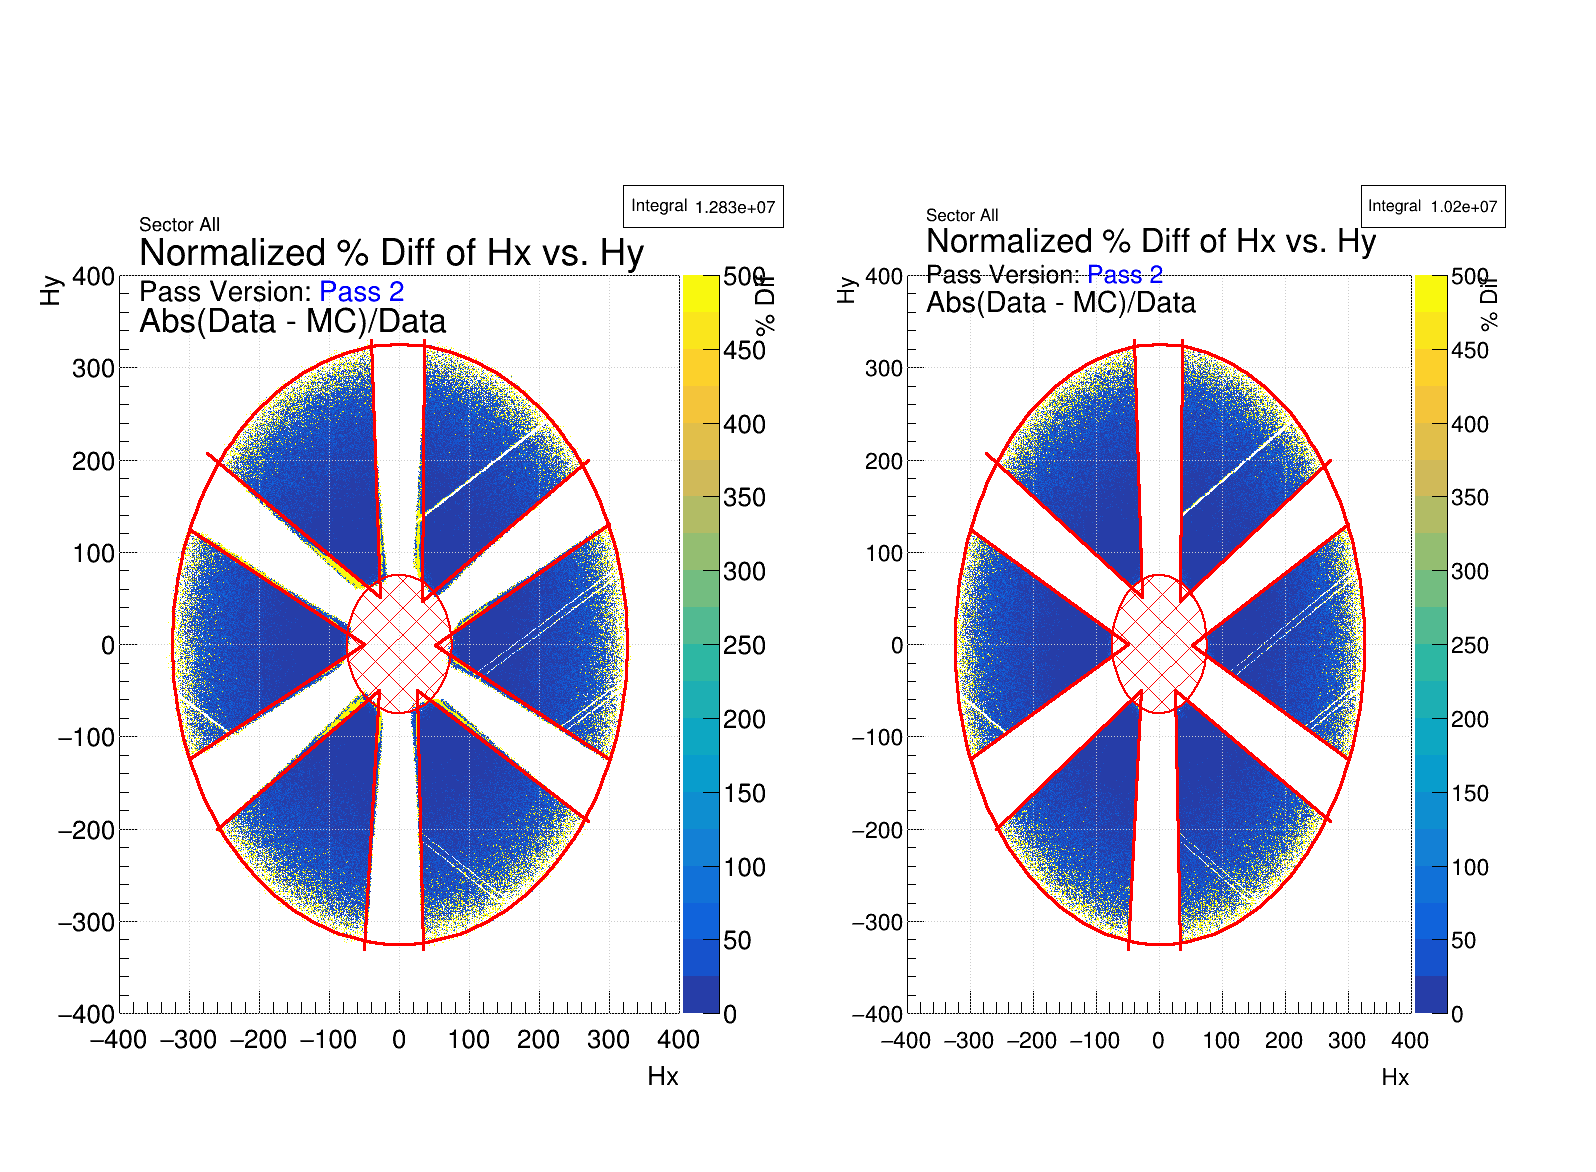

In [12]:
import ROOT
ROOT.gStyle.SetOptStat("i")
def apply_circular_cut(histogram, center_x, center_y, radius, radius_inner=False, sector=1):
    """Apply a circular cut and zero out bins outside the circle."""
    for binx in range(1, histogram.GetNbinsX() + 1):
        for biny in range(1, histogram.GetNbinsY() + 1):
            x = histogram.GetXaxis().GetBinCenter(binx)
            y = histogram.GetYaxis().GetBinCenter(biny)
            Cut_Condition = ((x - center_x)**2 + (y - center_y)**2 < radius**2) and (sector in [1, 2, 3, 4, 5, 6, 0, "All"])
            if(sector in [1, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y > (-0.4803)*x + (19.0945)) and (y < (0.5236)*x + (-27.0866)))
                Cut_Condition = Cut_Condition and not ((y > (-0.5)*x + (25.0)) and (y < (0.5241)*x + (-27.2289)))
            if(sector in [2, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y > (0.6749)*x + (17.7778)) and (y < (33.832)*x + (-877.4638)))
#                 Cut_Condition = Cut_Condition and not ((y > (0.6513)*x + (24.1597)) and (y < (77.2358)*x + (-2426.5447)))
                Cut_Condition = Cut_Condition and not ((y > (0.6439)*x + (26.145)) and (y < (76.7615)*x + (-2409.6186)))
            if(sector in [3, 0, "All"]):
#             if(sector in [3]):
                # Cut_Condition = Cut_Condition and not ((y > (-0.6442)*x + (29.6081)) and (y < (-19.0013)*x + (-430.0535)))
#                 Cut_Condition = Cut_Condition and not ((y > (-0.6306)*x + (33.3576)) and (y < (-23.3244)*x + (-602.9766)))
                Cut_Condition = Cut_Condition and not ((y > (-0.6292)*x + (33.7585)) and (y < (-23.2943)*x + (-601.7726)))
            if(sector in [4, 0, "All"]):
#             if(sector in [4]):
#                 Cut_Condition = Cut_Condition and not ((y > (0.4717)*x + (16.5094)) and (y < (-0.4717)*x + (-16.5094)))
                Cut_Condition = Cut_Condition and not ((y > (0.5)*x + (25.0)) and (y < (-0.5)*x + (-25.0)))
#             if(sector in [5]):
            if(sector in [5, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y < (0.669)*x + (-26.0705)) and (y > (12.6372)*x + (301.8584)))
                Cut_Condition = Cut_Condition and not ((y < (0.6494)*x + (-31.1688)) and (y > (13.3333)*x + (336.6667)))
#             if(sector in [6]):
            if(sector in [6, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x + (363.1938)))
                Cut_Condition = Cut_Condition and not ((y < (-0.5796)*x + (-35.5102)) and (y > (-35.0)*x + (825.0)))
            Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2) # Check if the bin center is outside the circle
            if(radius_inner):
                Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 < radius_inner**2)
            # Cut_Condition = Cut_Condition and not (histogram.GetBinContent(binx, biny) > 800)
            if(Cut_Condition):
                histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
    return histogram



# Define the center and radius of the circle for the cut
center_x, center_y, radius, radius_inner = 0, 0, 310, 75
center_x, center_y, radius, radius_inner = 0, 0, 325, 75
# center_x, center_y, radius = 0, 0, 79
# center_x, center_y, radius = 0, 0, 250

SECTOR_List = [1, 2, 3, 4, 5, 6]
SECTOR_List = [1, 2, 3, 4, 5, 6, "All"]
SECTOR_List = ["All"]
# SECTOR_List = [1]
canvas, h1, h2, lines, line_Max, circle = {}, {}, {}, {}, {}, {}
for SECTOR in SECTOR_List:
    h1[SECTOR] = Histo_ratio_2D.Clone(f"h1_{SECTOR}")
#     h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
#     h1[SECTOR].Scale(Histo_rdf_Total)

    # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
    # h1[SECTOR].Scale(Histo_mdf_Total)
    lines[SECTOR] = []
    if(SECTOR in [1, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(46, -3, 300, -125), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(46, -3, 300,  130), ROOT.kRed])
        
        # lines[SECTOR].append([ROOT.TLine(51, -0.5, 300, -125), ROOT.kViolet])
        # lines[SECTOR].append([ROOT.TLine(51, -0.5, 300,  130), ROOT.kViolet])
        
        lines[SECTOR].append([ROOT.TLine(51, -0.5, 300, -125), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(51, -0.5, 300,  130), ROOT.kRed])
        h1[SECTOR].GetXaxis().SetRangeUser(25, 400)
        h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
    if(SECTOR in [2, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine( 27, 36, 270,   200), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine( 27, 36, 35.69, 330), ROOT.kRed])
        
#         lines[SECTOR].append([ROOT.TLine(32, 45, 270,   200), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(32, 45, 35.69, 330), ROOT.kViolet])
        # lines[SECTOR].append([ROOT.TLine(32, 46.75, 270,   200), ROOT.kViolet])
        # lines[SECTOR].append([ROOT.TLine(32, 46.75, 35.69, 330), ROOT.kViolet])
        
        lines[SECTOR].append([ROOT.TLine(32, 46.75, 270,   200), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(32, 46.75, 35.69, 330), ROOT.kRed])
        h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
        h1[SECTOR].GetYaxis().SetRangeUser(0, 400)
    if(SECTOR in [3, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(-25.04, 45.74, -275, 206.776), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(-25.04, 45.74, -40,  330),     ROOT.kRed])
        
#         lines[SECTOR].append(ROOT.TLine(-28.04, 51.04, -275, 206.776))
#         lines[SECTOR].append(ROOT.TLine(-28.04, 51.04, -40,  330))
        # lines[SECTOR].append([ROOT.TLine(-28.04, 51.4, -275, 206.776), ROOT.kViolet])
        # lines[SECTOR].append([ROOT.TLine(-28.04, 51.4, -40,  330),     ROOT.kViolet])
        
        lines[SECTOR].append([ROOT.TLine(-28.04, 51.4, -275, 206.776), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(-28.04, 51.4, -40,  330),     ROOT.kRed])
        h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
        h1[SECTOR].GetYaxis().SetRangeUser(0,  400)
    if(SECTOR in [4, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(-35, 0, -300, -125), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(-35, 0, -300,  125), ROOT.kRed])
        
        # lines[SECTOR].append([ROOT.TLine(-50, 0, -300, -125), ROOT.kViolet])
        # lines[SECTOR].append([ROOT.TLine(-50, 0, -300,  125), ROOT.kViolet])
        
        lines[SECTOR].append([ROOT.TLine(-50, 0, -300, -125), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(-50, 0, -300,  125), ROOT.kRed])
        h1[SECTOR].GetXaxis().SetRangeUser(-400, -25)
        h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
    if(SECTOR in [5, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(-27.4, -44.4, -260, -200), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(-27.4, -44.4, -50,  -330), ROOT.kRed])
        
        # lines[SECTOR].append([ROOT.TLine(-29, -50, -260, -200), ROOT.kViolet])
        # lines[SECTOR].append([ROOT.TLine(-29, -50, -50,  -330), ROOT.kViolet])
        
        lines[SECTOR].append([ROOT.TLine(-29, -50, -260, -200), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(-29, -50, -50,  -330), ROOT.kRed])
        h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
        h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
#         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)
    if(SECTOR in [6, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(19.38, -43.9, 270, -192), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(19.38, -43.9, 33,  -330), ROOT.kRed])
        
        # lines[SECTOR].append([ROOT.TLine(25, -50, 270, -192), ROOT.kViolet])
        # lines[SECTOR].append([ROOT.TLine(25, -50, 33,  -330), ROOT.kViolet])
        
        lines[SECTOR].append([ROOT.TLine(25, -50, 270, -192), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(25, -50, 33,  -330), ROOT.kRed])
        h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
        h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
#         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)

    if(SECTOR in [0, "All"]):
        h1[SECTOR].GetXaxis().SetRangeUser(-400, 400)
        h1[SECTOR].GetYaxis().SetRangeUser(-400, 400)



    h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
    h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

    print(f"\nRUNNING FOR SECTOR {SECTOR}")
    print("\tBefore:")
    max_x, max_y = print_max_bin_coordinates(h2[SECTOR])

    # h2.GetXaxis().SetRangeUser(-300, 0)
    # h2.GetYaxis().SetRangeUser(0,  400)
    # Apply the cut
    h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, radius_inner, sector=SECTOR)

    # h2 = Histo_ratio_2D

    # Draw the histogram
    # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
    canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=1600, Size_Y=1200, cd_Space=0)
    Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
    h1[SECTOR].Draw("colz")
#     ROOT.gPad.SetLogz(1)
    Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
    h2[SECTOR].Draw("COLZ")
    # h2[SECTOR].RebinX(20)
    # h2[SECTOR].RebinY(20)
#     ROOT.gPad.SetLogz(1)
    
    print("\tAfter:")
    max_x, max_y = print_max_bin_coordinates(h2[SECTOR])
    line_Max[SECTOR] = ROOT.TLine(0, 0, max_x, max_y)
    line_Max[SECTOR].SetLineColor(ROOT.kGreen)
    line_Max[SECTOR].SetLineWidth(2)
#     line_Max[SECTOR].Draw("same")
    


#     circle, functions_intercept = {}, {}
    for CD_NUM in [1, 2]:
        Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
        # Set line attributes
        # Draw a circle centered at ('center_x', 'center_y') with a radius of 'radius'
        circle[f"{SECTOR}_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius)
        circle[f"{SECTOR}_{CD_NUM}"].SetFillStyle(0)  # Set the fill style to 0 (hollow)
        circle[f"{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kRed)  # Set the line color to red
        circle[f"{SECTOR}_{CD_NUM}"].SetLineWidth(3)  # Set the line width
        circle[f"{SECTOR}_{CD_NUM}"].Draw("SAME")  # Draw the circle on the same canvas as the histogram
        
        circle[f"Inner_{SECTOR}_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius_inner)
        circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillStyle(3644)
#         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillColor(ROOT.kViolet)
        circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillColor(ROOT.kRed)
#         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kViolet)
        circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kRed)
        circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineWidth(2)
        circle[f"Inner_{SECTOR}_{CD_NUM}"].Draw("SAME")
        
        for ii, line in enumerate(lines[SECTOR]):
            # line.SetLineColor(ROOT.kRed)
            # line.SetLineWidth(1)
            # line.Draw("same")  # Draw line on the same canvas as the histogram
            line[0].SetLineColor(line[1])
            line[0].SetLineWidth(3)
            line[0].Draw("same")  # Draw line on the same canvas as the histogram
            x1, y1, x2, y2 = line[0].GetX1(), line[0].GetY1(), line[0].GetX2(), line[0].GetY2()
            # Calculate slope (m) and intercept (c) of the line
            slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else "undefined"
            intercept = y1 - slope * x1 if slope != "undefined" else "undefined"
            # if(CD_NUM in [1]):
            if((CD_NUM in [1]) and (len(SECTOR_List) in [1]) and (line[1] in [ROOT.kViolet])):
                sign = ("\n                Cut_Condition = Cut_Condition and not ((y >" if(ii%2 == 0) else "and (y <") if(SECTOR not in [5, 6]) else ("\n                Cut_Condition = Cut_Condition and not ((y <" if(ii%2 == 0) else "and (y >")
                print(f"{sign} ({round(slope, 4)})*x + ({round(intercept, 4)}))")
#             functions_intercept[f"A_{CD_NUM}"] = slope
#             functions_intercept[f"B_{CD_NUM}"] = intercept

#     if(functions_intercept["A_1"] != functions_intercept["A_2"]):
#         x_intercept = (functions_intercept["B_2"] - functions_intercept["B_1"])/(functions_intercept["A_1"] - functions_intercept["A_2"])
#     else:
#         x_intercept = 0
#     y_intercept = functions_intercept["A_1"]*x_intercept + functions_intercept["B_1"]
#     print(f"Lines to intersect at (x, y) = {x_intercept}, {y_intercept}")
    
    # Update the canvas to see the result
    ROOT.gStyle.SetOptStat("i")
    canvas[SECTOR].Update()
    canvas[SECTOR].Draw()
    
print(")")


In [ ]:
# def Draw_With_Cuts(Histo_rdf_2D, Histo_mdf_2D, Histo_gdf_2D, Histo_ratio_2D):

# canvas, h1, h2, lines = {}, {}, {}, {}
# for SECTOR in SECTOR_List:
#     h1[SECTOR] = Histo_ratio_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR].Scale(Histo_rdf_Total)

#     # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
#     # h1[SECTOR].Scale(Histo_mdf_Total)
#     lines[SECTOR] = []
#     if(SECTOR in [1, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300, -125))
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300,  130))
# #         h1[SECTOR].GetXaxis().SetRangeUser(25, 400)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [2, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 270,   200))
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 35.69, 330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0, 400)
#     if(SECTOR in [3, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -275, 206.776))
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -40,  330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0,  400)
#     if(SECTOR in [4, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300, -125))
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300,  125))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-400, -25)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [5, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -260, -200))
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -50,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)
#     if(SECTOR in [6, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 270, -192))
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 33,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)



#     h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
#     h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

#     print(f"\nRUNNING FOR SECTOR {SECTOR}")
#     print("\tBefore:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])

#     # h2.GetXaxis().SetRangeUser(-300, 0)
#     # h2.GetYaxis().SetRangeUser(0,  400)
#     # Apply the cut
#     h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, sector=SECTOR)

#     # h2 = Histo_ratio_2D

#     # Draw the histogram
#     # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
#     canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h1[SECTOR].Draw("colz")
#     h1[SECTOR]
# #     ROOT.gPad.SetLogz(1)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h2[SECTOR].Draw("COLZ")
#     # h2[SECTOR].RebinX(20)
#     # h2[SECTOR].RebinY(20)
# #     ROOT.gPad.SetLogz(1)
    
#     print("\tAfter:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])
#     line_Max = ROOT.TLine(0, 0, max_x, max_y)
#     line_Max.SetLineColor(ROOT.kGreen)
#     line_Max.SetLineWidth(2)
#     line_Max.Draw("same")
    


#     circle, functions_intercept = {}, {}
#     for CD_NUM in [1, 2]:
#         Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#         # Set line attributes
#         # Draw a circle centered at ('center_x', 'center_y') with a radius of 'radius'
#         circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
#         circle[CD_NUM].SetFillStyle(0)  # Set the fill style to 0 (hollow)
#         circle[CD_NUM].SetLineColor(ROOT.kRed)  # Set the line color to red
#         circle[CD_NUM].SetLineWidth(2)  # Set the line width
#         circle[CD_NUM].Draw("SAME")  # Draw the circle on the same canvas as the histogram
#         for ii, line in enumerate(lines[SECTOR]):
#             line.SetLineColor(ROOT.kRed)
#             line.SetLineWidth(2)
#             line.Draw("same")  # Draw line on the same canvas as the histogram
#             x1, y1, x2, y2 = line.GetX1(), line.GetY1(), line.GetX2(), line.GetY2()
#             # Calculate slope (m) and intercept (c) of the line
#             slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else "undefined"
#             intercept = y1 - slope * x1 if slope != "undefined" else "undefined"
#             if(CD_NUM in [1]):
#                 sign = ("\n                Cut_Condition = (y <" if(ii < 1) else "or (y >") if(SECTOR not in [5, 6]) else ("\n                Cut_Condition = (y >" if(ii < 1) else "or (y <")
# #                 print(f"{sign} ({round(slope, 4)})*x + ({round(intercept, 4)}))")
# #             functions_intercept[f"A_{CD_NUM}"] = slope
# #             functions_intercept[f"B_{CD_NUM}"] = intercept

# #     if(functions_intercept["A_1"] != functions_intercept["A_2"]):
# #         x_intercept = (functions_intercept["B_2"] - functions_intercept["B_1"])/(functions_intercept["A_1"] - functions_intercept["A_2"])
# #     else:
# #         x_intercept = 0
# #     y_intercept = functions_intercept["A_1"]*x_intercept + functions_intercept["B_1"]
# #     print(f"Lines to intersect at (x, y) = {x_intercept}, {y_intercept}")
    
#     # Update the canvas to see the result
#     ROOT.gStyle.SetOptStat("i")
#     canvas[SECTOR].Update()
#     canvas[SECTOR].Draw()


In [ ]:
def grab_histogram_average(histogram):
    integral = histogram.Integral(1, histogram.GetNbinsX(), 1, histogram.GetNbinsY())
    num_bins = histogram.GetNbinsX() * histogram.GetNbinsY()
    average_content = integral / num_bins if num_bins != 0 else 0
    return average_content

h1 = Histo_ratio_2D.Clone("h1")
lines = []
# lines.append(ROOT.TLine(46,     -3,     300,  -125))
# lines.append(ROOT.TLine(46,     -3,     300,   130))
# lines.append(ROOT.TLine(27,     36,     270,   200))
# lines.append(ROOT.TLine(27,     36,     35.69, 330))
# lines.append(ROOT.TLine(-25.04, 45.74, -275,   206.776))
# lines.append(ROOT.TLine(-25.04, 45.74, -40,    330))
# lines.append(ROOT.TLine(-35,     0,    -300,  -125))
# lines.append(ROOT.TLine(-35,     0,    -300,   125))
# lines.append(ROOT.TLine(-27.4, -44.4,  -260,  -200))
# lines.append(ROOT.TLine(-27.4, -44.4,  -50,   -330))
# lines.append(ROOT.TLine(19.38, -43.9,   270,  -192))
# lines.append(ROOT.TLine(19.38, -43.9,   33,   -330))

lines = []
# if(SECTOR in [1, 0, "All"]):
lines.append([ROOT.TLine( 46,   -3,       300, -125),     ROOT.kRed])
lines.append([ROOT.TLine( 46,   -3,       300,  130),     ROOT.kRed])
lines.append([ROOT.TLine( 51,   -0.5,     300, -125),     ROOT.kViolet])
lines.append([ROOT.TLine( 51,   -0.5,     300,  130),     ROOT.kViolet])
# if(SECTOR in [2, 0, "All"]):
lines.append([ROOT.TLine( 27,    36,      270,  200),     ROOT.kRed])
lines.append([ROOT.TLine( 27,    36,    35.69,  330),     ROOT.kRed])
lines.append([ROOT.TLine( 32,    46.75,   270,  200),     ROOT.kViolet])
lines.append([ROOT.TLine( 32,    46.75, 35.69,  330),     ROOT.kViolet])
# if(SECTOR in [3, 0, "All"]):
lines.append([ROOT.TLine(-25.04, 45.74,  -275,  206.776), ROOT.kRed])
lines.append([ROOT.TLine(-25.04, 45.74,   -40,  330),     ROOT.kRed])
lines.append([ROOT.TLine(-28.04, 51.4,   -275,  206.776), ROOT.kViolet])
lines.append([ROOT.TLine(-28.04, 51.4,    -40,  330),     ROOT.kViolet])
# if(SECTOR in [4, 0, "All"]):
lines.append([ROOT.TLine(-35,        0,  -300, -125),     ROOT.kRed])
lines.append([ROOT.TLine(-35,        0,  -300,  125),     ROOT.kRed])
lines.append([ROOT.TLine(-50,        0,  -300, -125),     ROOT.kViolet])
lines.append([ROOT.TLine(-50,        0,  -300,  125),     ROOT.kViolet])
# if(SECTOR in [5, 0, "All"]):
lines.append([ROOT.TLine(-27.4,  -44.4,  -260, -200),     ROOT.kRed])
lines.append([ROOT.TLine(-27.4,  -44.4,   -50, -330),     ROOT.kRed])
lines.append([ROOT.TLine(-29,    -50,    -260, -200),     ROOT.kViolet])
lines.append([ROOT.TLine(-29,    -50,     -50, -330),     ROOT.kViolet])
# if(SECTOR in [6, 0, "All"]):
lines.append([ROOT.TLine( 19.38, -43.9, 270, -192),       ROOT.kRed])
lines.append([ROOT.TLine( 19.38, -43.9, 33,  -330),       ROOT.kRed])
lines.append([ROOT.TLine( 25,    -50, 270, -192),         ROOT.kViolet])
lines.append([ROOT.TLine( 25,    -50, 33,  -330),         ROOT.kViolet])

h2 = h1.Clone("h2")
h2.SetTitle("".join(["#splitline{#scale[1.8]{With New Additional Cuts}}{", str(h1.GetTitle()), "}"]))
h1.SetTitle("".join(["#splitline{#scale[1.8]{Without Additional Cuts}}{",  str(h1.GetTitle()), "}"]))

# Histo_mdf_2D.Scale(Histo_mdf_Total)
# Histo_rdf_2D.Scale(Histo_rdf_Total)
# Histo_gdf_2D.Scale(Histo_gdf_Total)

Histo_rdf_2D_Clone = Histo_rdf_2D.Clone(f"{Histo_rdf_2D.GetName()}_Clone")
Histo_mdf_2D_Clone = Histo_mdf_2D.Clone(f"{Histo_mdf_2D.GetName()}_Clone")

Histo_rdf_2D_Cut = Histo_rdf_2D_Clone.Clone("Histo_rdf_2D_Cut")
Histo_rdf_2D_Cut.SetTitle("".join(["#splitline{#scale[1.8]{With New Additional Cuts}}{",  str(Histo_mdf_2D_Clone.GetTitle()), "}"]))
Histo_rdf_2D_Clone.SetTitle("".join(["#splitline{#scale[1.8]{Without Additional Cuts}}{", str(Histo_mdf_2D_Clone.GetTitle()), "}"]))
Histo_mdf_2D_Cut = Histo_rdf_2D_Clone.Clone("Histo_mdf_2D_Cut")
Histo_mdf_2D_Cut.SetTitle("".join(["#splitline{#scale[1.8]{With New Additional Cuts}}{",  str(Histo_mdf_2D_Clone.GetTitle()), "}"]))
Histo_rdf_2D_Clone.SetTitle("".join(["#splitline{#scale[1.8]{Without Additional Cuts}}{", str(Histo_mdf_2D_Clone.GetTitle()), "}"]))


center_x, center_y, radius, radius_inner = 0, 0, 325, 75
# Apply the cut
h2 = apply_circular_cut(h2, center_x, center_y, radius, sector="All")
Histo_rdf_2D_Cut = apply_circular_cut(Histo_rdf_2D_Cut, center_x, center_y, radius, radius_inner, sector="All")
Histo_mdf_2D_Cut = apply_circular_cut(Histo_mdf_2D_Cut, center_x, center_y, radius, radius_inner, sector="All")


canvas = Canvas_Create(Name="Name_New", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
# ROOT.gPad.SetLogz(1)
canvas.Draw()

Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_2D.Draw("colz")
Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_mdf_2D.Draw("colz")
Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_gdf_2D.Draw("colz")

Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_2D_Cut.Draw("colz")
Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_mdf_2D_Cut.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_gdf_2D_Cut.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# h1.Draw("colz")
# ROOT.gPad.SetLogz(1)
# print("\tBefore Cut:")
# max_x, max_y = print_max_bin_coordinates(h1)
# line_Max_1 = ROOT.TLine(0, 0, max_x, max_y)
# line_Max_1.SetLineColor(ROOT.kGreen)
# line_Max_1.SetLineWidth(2)
# # line_Max_1.Draw("same")

# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# h2.Draw("colz")
# ROOT.gPad.SetLogz(1)

# print("\tAfter Cut:")
# max_x, max_y = print_max_bin_coordinates(h2)
# line_Max_2 = ROOT.TLine(0, 0, max_x, max_y)
# line_Max_2.SetLineColor(ROOT.kGreen)
# line_Max_2.SetLineWidth(2)
# # line_Max_2.Draw("same")


average_h1 = grab_histogram_average(h1)
average_h2 = grab_histogram_average(h2)

print("\n\n")
print(f"{color.BOLD}average_h1 = {color.END}{round(average_h1, 5)}")
print(f"{color.BOLD}average_h2 = {color.END}{round(average_h2, 5)}")
ave_difference = (average_h1 - average_h2)#/average_h1)*100
print(f"{color.BOLD}ave_difference = {color.END}{round(ave_difference, 5)}%")

circle = {}
for CD_NUM in [1, 2, 3, 4, 5]:
    Draw_Canvas(canvas=canvas, cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
    circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
    circle[CD_NUM].SetFillStyle(0)
    circle[CD_NUM].SetLineColor(ROOT.kRed)
    circle[CD_NUM].SetLineWidth(2)
    circle[CD_NUM].Draw("SAME")
    circle[f"Inner_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius_inner)
    circle[f"Inner_{CD_NUM}"].SetFillStyle(3644)
    circle[f"Inner_{CD_NUM}"].SetFillColor(ROOT.kViolet)
    circle[f"Inner_{CD_NUM}"].SetLineColor(ROOT.kViolet)
    circle[f"Inner_{CD_NUM}"].SetLineWidth(1)
    circle[f"Inner_{CD_NUM}"].Draw("SAME")
    for ii, line in enumerate(lines):
        line[0].SetLineColor(line[1])
        line[0].SetLineWidth(2)
        line[0].Draw("same")

# Update the canvas to see the result
ROOT.gStyle.SetOptStat("i")
canvas.Update()
canvas.Draw()

print("Done")

In [ ]:
# def Draw_With_Cuts(Histo_rdf_2D, Histo_mdf_2D, Histo_gdf_2D, Histo_ratio_2D):
#     h1 = Histo_ratio_2D.Clone("h1")
#     lines = []
#     lines.append(ROOT.TLine(46,     -3,     300,  -125))
#     lines.append(ROOT.TLine(46,     -3,     300,   130))
#     lines.append(ROOT.TLine(27,     36,     270,   200))
#     lines.append(ROOT.TLine(27,     36,     35.69, 330))
#     lines.append(ROOT.TLine(-25.04, 45.74, -275,   206.776))
#     lines.append(ROOT.TLine(-25.04, 45.74, -40,    330))
#     lines.append(ROOT.TLine(-35,     0,    -300,  -125))
#     lines.append(ROOT.TLine(-35,     0,    -300,   125))
#     lines.append(ROOT.TLine(-27.4, -44.4,  -260,  -200))
#     lines.append(ROOT.TLine(-27.4, -44.4,  -50,   -330))
#     lines.append(ROOT.TLine(19.38, -43.9,   270,  -192))
#     lines.append(ROOT.TLine(19.38, -43.9,   33,   -330))

#     h2 = h1.Clone("h2")
#     h2.SetTitle("".join(["#splitline{With New Additional Cuts}{", str(h1.GetTitle()), "}"]))
    
#     print("\tBefore Cut:")
#     max_x, max_y = print_max_bin_coordinates(h2)

#     center_x, center_y, radius = 0, 0, 325
#     # Apply the cut
#     h2 = apply_circular_cut(h2, center_x, center_y, radius, sector="All")

#     canvas = Canvas_Create(Name="Name_New", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
#     # ROOT.gPad.SetLogz(1)
#     canvas.Draw()
    
#     Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_rdf_2D.Draw("colz")
#     Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_mdf_2D.Draw("colz")
#     Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_gdf_2D.Draw("colz")
    
#     Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_ratio_2D.Draw("colz")
#     # ROOT.gPad.SetLogz(1)
#     Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h2.Draw("colz")
#     # ROOT.gPad.SetLogz(1)
    
#     print("\tAfter Cut:")
# #     max_x, max_y = print_max_bin_coordinates(h2)
# #     line_Max = ROOT.TLine(0, 0, max_x, max_y)
# #     line_Max.SetLineColor(ROOT.kGreen)
# #     line_Max.SetLineWidth(2)
# #     line_Max.Draw("same")
    
#     circle = {}
#     for CD_NUM in [1, 2, 3, 4, 5]:
#         Draw_Canvas(canvas=canvas, cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#         circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
#         circle[CD_NUM].SetFillStyle(0)
#         circle[CD_NUM].SetLineColor(ROOT.kRed)
#         circle[CD_NUM].SetLineWidth(2)
#         circle[CD_NUM].Draw("SAME")
#         for ii, line in enumerate(lines):
#             line.SetLineColor(ROOT.kRed)
#             line.SetLineWidth(2)
#             line.Draw("same")
    
#     # Update the canvas to see the result
#     ROOT.gStyle.SetOptStat("i")
#     canvas.Update()
#     canvas.Draw()
# #     return canvas

    
# # new_canvas = 
# Draw_With_Cuts(Histo_rdf_2D, Histo_mdf_2D, Histo_gdf_2D, Histo_ratio_2D)

# # new_canvas.Draw()

# print("Done")

In [ ]:
canvas = Canvas_Create(Name="Name_New", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
# ROOT.gPad.SetLogz(1)
canvas.Draw()

Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_2D.Draw("colz")
Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_mdf_2D.Draw("colz")
Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_gdf_2D.Draw("colz")

Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_ratio_2D.Draw("colz")

Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_ratio_2D_Log = Histo_ratio_2D.Clone("Logscale")
Histo_ratio_2D_Log.SetTitle("".join(["#splitline{", str(Histo_ratio_2D.GetTitle()), "}{#scale[1.5]{Log Scale}}"]))
Histo_ratio_2D_Log.Draw("colz")
ROOT.gPad.SetLogz(1)

# Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# Histo_ratio_2D.Draw("lego")
# # ROOT.gPad.SetLogz(1)
print("Done")

print(f"Histo_mdf_Total = {Histo_mdf_Total}")
print(f"Histo_rdf_Total = {Histo_rdf_Total}")
print(f"Histo_gdf_Total = {Histo_gdf_Total}")


In [ ]:
# """
# Cut_Condition = ((x - center_x)**2 + (y - center_y)**2 < radius**2)
# and (not ((y > (-0.4803)*x +  (19.0945)) and (y <   (0.5236)*x +  (-27.0866))))
# and (not ((y >  (0.6749)*x +  (17.7778)) and (y <   (33.832)*x + (-877.4638))))
# and (not ((y > (-0.6442)*x +  (29.6081)) and (y < (-19.0013)*x + (-430.0535))))
# and (not ((y >  (0.4717)*x +  (16.5094)) and (y <  (-0.4717)*x +  (-16.5094))))
# and (not ((y <   (0.669)*x + (-26.0705)) and (y >  (12.6372)*x +  (301.8584))))
# and (not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x +  (363.1938))))
# or              ((x - center_x)**2 + (y - center_y)**2 > radius**2)"""

# # test = """radius = ((x*x) + (y*y));
# test = """Cut_Condition = '(radius < (325*325))
# and (not ((y  > (-0.4803)*x +  (19.0945)) and (y <   (0.5236)*x +  (-27.0866))))
# and (not ((y  >  (0.6749)*x +  (17.7778)) and (y <   (33.832)*x + (-877.4638))))
# and (not ((y  > (-0.6442)*x +  (29.6081)) and (y < (-19.0013)*x + (-430.0535))))
# and (not ((y  >  (0.4717)*x +  (16.5094)) and (y <  (-0.4717)*x +  (-16.5094))))
# and (not ((y  <   (0.669)*x + (-26.0705)) and (y >  (12.6372)*x +  (301.8584))))
# and (not ((y  < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x +  (363.1938)))))
# or (radius > (325*325))'"""

# test = str(test.replace("x", "Hx")).replace("y", "Hy")
# test = test.replace("and", "&&")
# test = test.replace("or",  "||")
# test = test.replace("not ", "!")
# test = test.replace("\n", " ")
# test = test.replace(";", ";\n\n")
# test = test.replace("radius", "((Hx*Hx) + (Hy*Hy))")
# while("  " in test):
#     test = test.replace("  ", " ")
# print(test)

In [ ]:
New_Fiducial_Sector_Cuts = '! ((((Hx*Hx) + (Hy*Hy)) < (325*325)) && (!((Hy > (-0.4803)*Hx + (19.0945)) && (Hy < (0.5236)*Hx + (-27.0866)))) && (!((Hy > (0.6749)*Hx + (17.7778)) && (Hy < (33.832)*Hx + (-877.4638)))) && (!((Hy > (-0.6442)*Hx + (29.6081)) && (Hy < (-19.0013)*Hx + (-430.0535)))) && (!((Hy > (0.4717)*Hx + (16.5094)) && (Hy < (-0.4717)*Hx + (-16.5094)))) && (!((Hy < (0.669)*Hx + (-26.0705)) && (Hy > (12.6372)*Hx + (301.8584)))) && (!((Hy < (-0.5909)*Hx + (-32.4477)) && (Hy > (-21.0059)*Hx + (363.1938))))) || (((Hx*Hx) + (Hy*Hy)) > (325*325)))'

In [ ]:
Cut_Condition = ''' = """
if((((x)*(x) + (y)*(y)) > (radius)*(radius)) || (((x)*(x) + (y)*(y)) < (radius_inner)*(radius_inner))){
    return false;
}
else{
    bool Cut_Condition =                        (((x)*(x) + (y)*(y)) < (radius)*(radius))
    Cut_Condition      =  Cut_Condition and not ((y >     (-0.5)*x +     (25.0)) and (y <   (0.5241)*x +   (-27.2289)))
    Cut_Condition      =  Cut_Condition and not ((y >   (0.6439)*x +   (26.145)) and (y <  (76.7615)*x + (-2409.6186)))
    Cut_Condition      =  Cut_Condition and not ((y >  (-0.6292)*x +  (33.7585)) and (y < (-23.2943)*x +  (-601.7726)))
    Cut_Condition      =  Cut_Condition and not ((y >      (0.5)*x +     (25.0)) and (y <     (-0.5)*x +      (-25.0)))
    Cut_Condition      =  Cut_Condition and not ((y <  ( 0.6494)*x + (-31.1688)) and (y >  (13.3333)*x +   (336.6667)))
    Cut_Condition      =  Cut_Condition and not ((y <  (-0.5796)*x + (-35.5102)) and (y >    (-35.0)*x +      (825.0)))
    Cut_Condition      = not Cut_Condition;
    return Cut_Condition;
}
"""'''

Cut_Condition = Cut_Condition.replace("and", "&&")
Cut_Condition = Cut_Condition.replace("not ", "!")
Cut_Condition = Cut_Condition.replace("or",  "||")
Cut_Condition = Cut_Condition.replace(")\n", ");\n")
Cut_Condition = Cut_Condition.replace("x",  "Hx")
Cut_Condition = Cut_Condition.replace("y",  "Hy")
Cut_Condition = Cut_Condition.replace("radius_inner",  str(radius_inner))
Cut_Condition = Cut_Condition.replace("radius",        str(radius))
Cut_Condition = Cut_Condition.replace("Cut_Condition", "Fiducial_PCAL_Cuts")
Cut_Condition = Cut_Condition.replace("\n", "\n# ")
print(f"\n# New_Fiducial_Sector_Cuts{Cut_Condition}")

In [ ]:
# New_Fiducial_Sector_Cuts = """
# if((((Hx)*(Hx) + (Hy)*(Hy)) > (325)*(325)) || (((Hx)*(Hx) + (Hy)*(Hy)) < (75)*(75))){
#     return false;
# }
# else{
#     bool Fiducial_PCAL_Cuts =                        (((Hx)*(Hx) + (Hy)*(Hy)) < (325)*(325));
#     Fiducial_PCAL_Cuts      =  Fiducial_PCAL_Cuts && !((Hy >     (-0.5)*Hx +     (25.0)) && (Hy <   (0.5241)*Hx +   (-27.2289)));
#     Fiducial_PCAL_Cuts      =  Fiducial_PCAL_Cuts && !((Hy >   (0.6439)*Hx +   (26.145)) && (Hy <  (76.7615)*Hx + (-2409.6186)));
#     Fiducial_PCAL_Cuts      =  Fiducial_PCAL_Cuts && !((Hy >  (-0.6292)*Hx +  (33.7585)) && (Hy < (-23.2943)*Hx +  (-601.7726)));
#     Fiducial_PCAL_Cuts      =  Fiducial_PCAL_Cuts && !((Hy >      (0.5)*Hx +     (25.0)) && (Hy <     (-0.5)*Hx +      (-25.0)));
#     Fiducial_PCAL_Cuts      =  Fiducial_PCAL_Cuts && !((Hy <  ( 0.6494)*Hx + (-31.1688)) && (Hy >  (13.3333)*Hx +   (336.6667)));
#     Fiducial_PCAL_Cuts      =  Fiducial_PCAL_Cuts && !((Hy <  (-0.5796)*Hx + (-35.5102)) && (Hy >    (-35.0)*Hx +      (825.0)));
#     Fiducial_PCAL_Cuts      = !Fiducial_PCAL_Cuts;
#     return Fiducial_PCAL_Cuts;
# }
# """

In [ ]:
# import ROOT
# ROOT.gStyle.SetOptStat("i")
# def apply_circular_cut(histogram, center_x, center_y, radius, sector=1):
#     """Apply a circular cut and zero out bins outside the circle."""
#     for binx in range(1, histogram.GetNbinsX() + 1):
#         for biny in range(1, histogram.GetNbinsY() + 1):
#             x = histogram.GetXaxis().GetBinCenter(binx)
#             y = histogram.GetYaxis().GetBinCenter(biny)
#             Cut_Condition = False
#             if(sector == 3):
#                 Cut_Condition = (y < (-0.6327)*x + (29.1837)) or (y > (-19.0)*x + (-430.0))
#             Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2)
#             # Check if the bin center is outside the circle
#             if(Cut_Condition):
#                 histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
#     return histogram

# # def main():
# # Example histogram
# h2 = ROOT.TH2D("h2", "Example Histogram;Hx;Hy", 100, -400, 400, 100, -400, 400)

# # Fill the histogram with dummy data
# for i in range(10000):
#     h2.Fill(ROOT.gRandom.Gaus(100, 100), ROOT.gRandom.Gaus(100, 150))
#     h2.Fill(ROOT.gRandom.Gaus(-100, 100), ROOT.gRandom.Gaus(-100, 150))

# # Define the center and radius of the circle for the cut
# center_x, center_y, radius = 100, 100, 150

# center_x, center_y, radius = 0, 0, 300

# # h1 = Histo_ratio_2D.Clone("h1")
# h1 = Histo_rdf_2D.Clone("h1")

# # h1.Scale(Histo_rdf_Total)

# # h1.GetXaxis().SetRangeUser(-300, 0)
# # h1.GetYaxis().SetRangeUser(0,  400)


# h2 = h1.Clone("h2")



# # h2.GetXaxis().SetRangeUser(-300, 0)
# # h2.GetYaxis().SetRangeUser(0,  400)
# # Apply the cut
# h2 = apply_circular_cut(h2, center_x, center_y, radius, sector=3)

# # h2 = Histo_ratio_2D

# # Draw the histogram
# # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
# canvas = Canvas_Create(Name="Name", Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
# Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# h1.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# h2.Draw("COLZ")


# # Define lines; adjust coordinates as needed for your cuts
# lines = [
#     ROOT.TLine(-300, -400, 300, 400),  # Diagonal line from bottom-left to top-right
#     ROOT.TLine(-300, 400, 300, -400),  # Diagonal line from top-left to bottom-right
#     ROOT.TLine(0, -400, 0, 400),       # Vertical line through the center
#     ROOT.TLine(-400, 0, 400, 0)        # Horizontal line through the center
# ]

# lines = [
#     ROOT.TLine(-270, 200, -40, 50),  # Diagonal line from top-left to bottom-right
# #     ROOT.TLine(0, 0, 0, 400),       # Vertical line through the center
#     ROOT.TLine(-23, 50, -40, 330)
# ]

# lines = [
#     ROOT.TLine(-22.3, 38.5, -270, 200),  # Diagonal line from top-left to bottom-right
#     ROOT.TLine(-22.3, 38.5, -40, 330)
# ]

# SECTOR = 3
# if(SECTOR == 3):
#     lines = [
#         ROOT.TLine(-25, 45, -270, 200),  # Diagonal line from top-left to bottom-right
#         ROOT.TLine(-25, 45, -40, 330)
#     ]

# for CD_NUM in [1, 2]:
#     Draw_Canvas(canvas=canvas, cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     # Set line attributes
#     for line in lines:
#         line.SetLineColor(ROOT.kRed)
#         line.SetLineWidth(2)
#         line.Draw("same")  # Draw line on the same canvas as the histogram
#         if(CD_NUM in [1]):
#             x1, y1, x2, y2 = line.GetX1(), line.GetY1(), line.GetX2(), line.GetY2()
#             # Calculate slope (m) and intercept (c) of the line
#             slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else "undefined"
#             intercept = y1 - slope * x1 if slope != "undefined" else "undefined"
#         #     print(f"\nLine from ({x1}, {y1}) to ({x2}, {y2}) has slope {slope} and intercept {intercept}")
#             print(f"Hy = ({round(slope, 4)})*Hx + ({round(intercept, 4)})")

# # Update the canvas to see the result
# ROOT.gStyle.SetOptStat("i")
# canvas.Update()
# #     canvas.SaveAs("cut_histogram.png")  # Save the canvas as an image
# canvas.Draw()

# # if __name__ == "__main__":
# #     main()


## For Hx_pip vs Hy_pip

#splitline{Sector All}{#splitline{#splitline{#scale[1.75]{Normalized % Diff of Hx_{#pi+} vs Hy_{#pi+}}}{#scale[1.5]{Pass Version: #color[4]{Pass 2}}}}{#scale[1.55]{Abs(Data - MC)/Data}}}

RUNNING FOR SECTOR All
	Before:
Maximum bin content is 500.0 at x = -25.9, y = 1.5000000000000022
-25.9, 1.5000000000000022
	After:
Maximum bin content is 500.0 at x = -20.099999999999998, y = -2.099999999999999
-20.099999999999998, -2.099999999999999
)


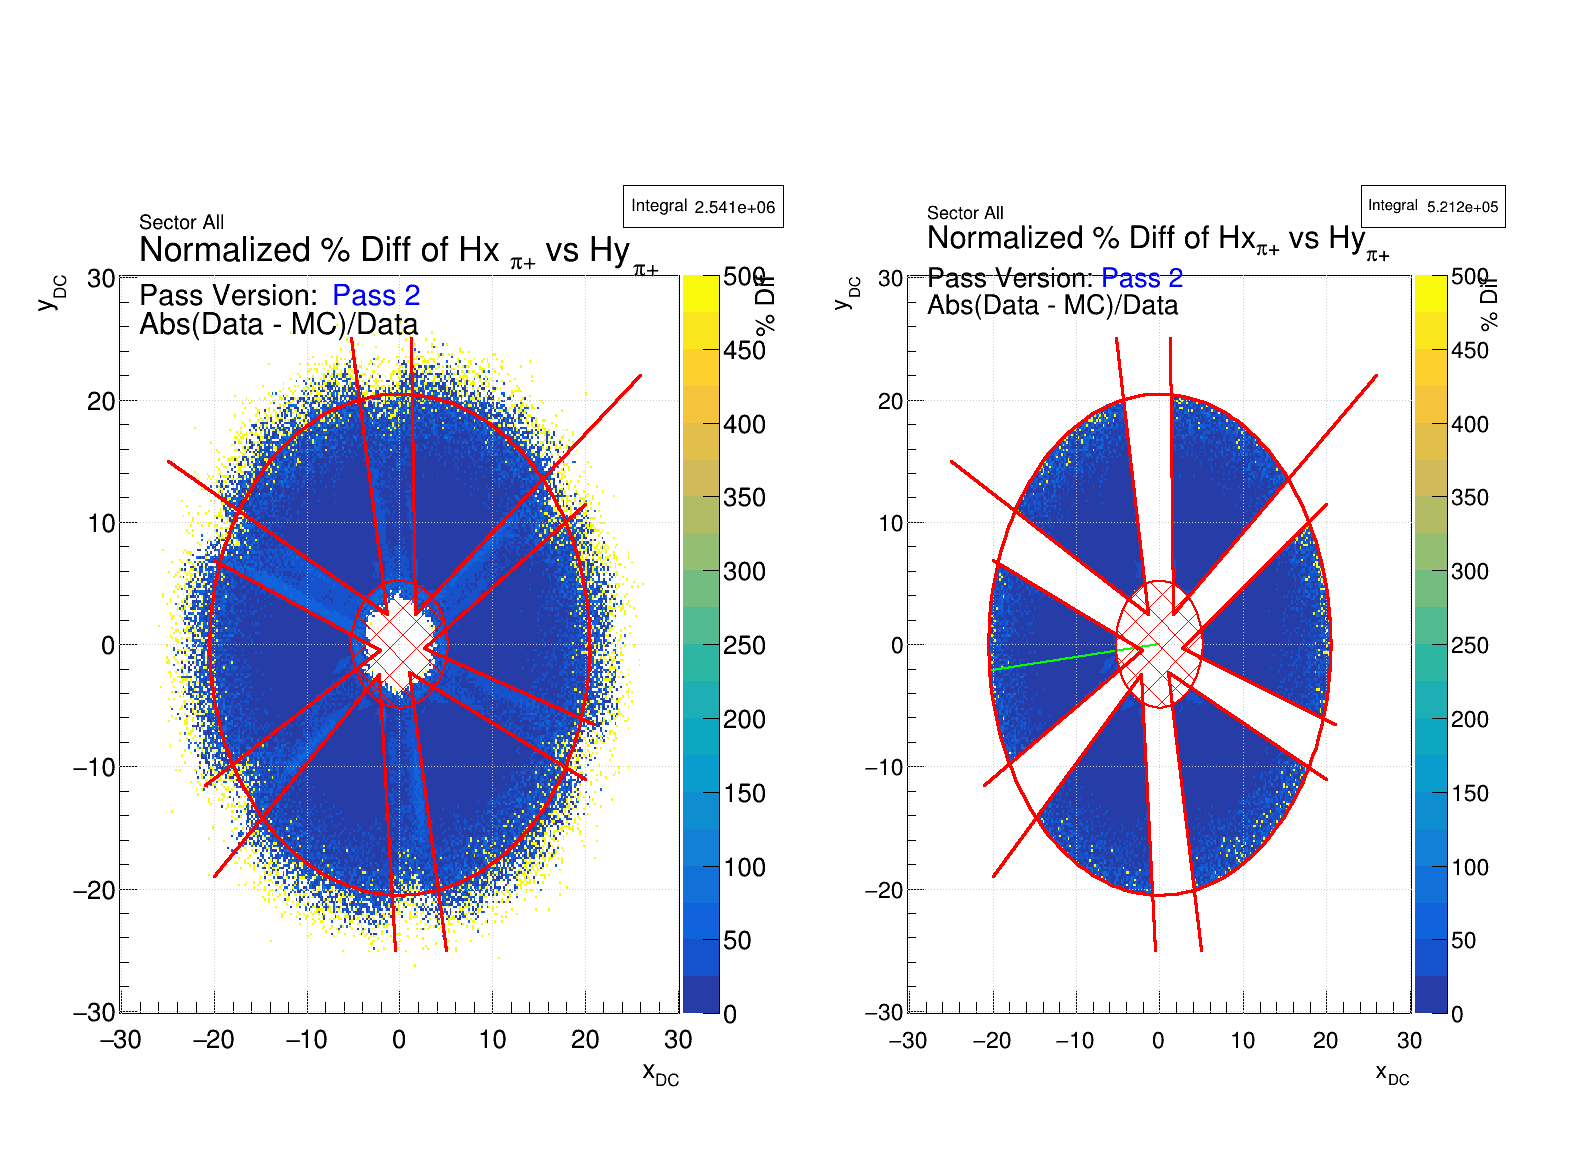

In [18]:
import ROOT
ROOT.gStyle.SetOptStat("i")
def apply_circular_cut(histogram, center_x, center_y, radius, radius_inner=False, sector=1):
    """Apply a circular cut and zero out bins outside the circle."""
    for binx in range(0, histogram.GetNbinsX() + 2):
        for biny in range(0, histogram.GetNbinsY() + 2):
            x = histogram.GetXaxis().GetBinCenter(binx)
            y = histogram.GetYaxis().GetBinCenter(biny)
            Cut_Condition = False
            Cut_Condition = ((x - center_x)**2 + (y - center_y)**2 < radius**2) and (sector in [1, 2, 3, 4, 5, 6, 0, "All"])
            if(sector in [1, 0, "All"]):
                Cut_Condition = Cut_Condition and not ((y > (-0.3379)*x + (0.5954))  and (y < (0.6801)*x + (-2.1023)))
            if(sector in [2, 0, "All"]):
                Cut_Condition = Cut_Condition and not ((y > (-56.375)*x + (95.4688)) and (y > (0.8029)*x + (1.1253)))
            if(sector in [3, 0, "All"]):
                Cut_Condition = Cut_Condition and not ((y > (-0.5307)*x + (1.7336))  and (y < (-5.7821)*x + (-5.3558)))
            if(sector in [4, 0, "All"]):
                Cut_Condition = Cut_Condition and not ((y > (0.5805)*x  + (0.69))    and (y < (-0.4095)*x + (-1.3394)))
            if(sector in [5, 0, "All"]):
                Cut_Condition = Cut_Condition and not ((y < (0.9324)*x  + (-0.3521)) and (y < (-12.8857)*x + (-31.4429)))
            if(sector in [6, 0, "All"]):
                Cut_Condition = Cut_Condition and not ((y < (-0.4617)*x + (-1.7652)) and (y > (-5.7595)*x + (3.7975)))
            Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2) # Check if the bin center is outside the circle
            if(radius_inner):
                Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 < radius_inner**2)
            # Cut_Condition = Cut_Condition and not (histogram.GetBinContent(binx, biny) > 800)
            if(Cut_Condition):
                histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
    return histogram



# Define the center and radius of the circle for the cut
center_x, center_y, radius, radius_inner = 0, 0, 310, 75
center_x, center_y, radius, radius_inner = 0, 0, 325, 75

center_x, center_y, radius, radius_inner = 0, 0, 325, 22

center_x, center_y, radius, radius_inner = 0, 0, 21.5, 5.2

center_x, center_y, radius, radius_inner = 0, 0, 20.5, 5.2

# center_x, center_y, radius, radius_inner = 0, 0, 19.15, 5.2

# center_x, center_y, radius, radius_inner = 0, 0, 15.5, 5.2

# center_x, center_y, radius = 0, 0, 79
# center_x, center_y, radius = 0, 0, 250

SECTOR_List = [1, 2, 3, 4, 5, 6]
SECTOR_List = [1, 2, 3, 4, 5, 6, "All"]
SECTOR_List = ["All"]
# SECTOR_List = [5]
canvas, h1, h2, lines, line_Max, circle = {}, {}, {}, {}, {}, {}
for SECTOR in SECTOR_List:
    h1[SECTOR] = Histo_ratio_2D.Clone(f"h1_{SECTOR}")
#     h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
#     h1[SECTOR].Scale(Histo_rdf_Total)

#     h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
#     h1[SECTOR].Scale(Histo_mdf_Total)
    lines[SECTOR] = []
    if(SECTOR in [1, 0, "All"]):
        # lines[SECTOR].append([ROOT.TLine(51, -0.5, 300, -125), ROOT.kViolet])
        # lines[SECTOR].append([ROOT.TLine(51, -0.5, 300,  130), ROOT.kViolet])

#         lines[SECTOR].append([ROOT.TLine(1.95, -0.4, 21, -6.5), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(1.95, -0.4, 20, 11.5), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(2.65, -0.3, 21, -6.5), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(2.65, -0.3, 20, 11.5), ROOT.kRed])
        h1[SECTOR].GetXaxis().SetRangeUser(-1, 30)
        h1[SECTOR].GetYaxis().SetRangeUser(-20, 20)
    if(SECTOR in [2, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(1.05, 2.25, 26,   22), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(1.05, 2.25, 1.25, 25), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(1.65, 2.45, 1.25, 25), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(1.65, 2.45, 26,   22), ROOT.kRed])
        h1[SECTOR].GetXaxis().SetRangeUser(-10, 30)
        h1[SECTOR].GetYaxis().SetRangeUser(-1,  40)
    if(SECTOR in [3, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(-0.95, 2.05, -25,   15), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(-0.95, 2.05, -5.25, 25), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(-1.35, 2.45, -25,   15), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(-1.35, 2.45, -5.25, 25), ROOT.kRed])
        h1[SECTOR].GetXaxis().SetRangeUser(-30, 30)
        h1[SECTOR].GetYaxis().SetRangeUser(-1,  30)
    if(SECTOR in [4, 0, "All"]):
        lines[SECTOR].append([ROOT.TLine(-2.05, -0.5, -21, -11.5), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(-2.05, -0.5, -20,  6.85), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(-2.95, -0.05, -21, -11.5), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(-2.95, -0.05, -20,  6.85), ROOT.kViolet])
        h1[SECTOR].GetXaxis().SetRangeUser(-25, 1)
        h1[SECTOR].GetYaxis().SetRangeUser(-20, 20)
    if(SECTOR in [5, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(-1.95, -2.15,  -20, -19), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(-1.95, -2.15, -0.5, -25), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(-2.25, -2.45,  -20, -19), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(-2.25, -2.45, -0.5, -25), ROOT.kRed])
        h1[SECTOR].GetXaxis().SetRangeUser(-20, 10)
        h1[SECTOR].GetYaxis().SetRangeUser(-30, 1)
#         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)
    if(SECTOR in [6, 0, "All"]):
        lines[SECTOR].append([ROOT.TLine(1.05, -2.25,  20, -11), ROOT.kRed])
        lines[SECTOR].append([ROOT.TLine(1.05, -2.25,   5, -25), ROOT.kRed])
        h1[SECTOR].GetXaxis().SetRangeUser(-10, 20)
        h1[SECTOR].GetYaxis().SetRangeUser(-30, 10)

    if(SECTOR in [0, "All"]):
        h1[SECTOR].GetXaxis().SetRangeUser(-400, 400)
        h1[SECTOR].GetYaxis().SetRangeUser(-400, 400)



    h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
    h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{#splitline{#splitline{#scale[1.75]{Normalized % Diff of Hx_{#pi+} vs Hy_{#pi+}}}{#scale[1.5]{Pass Version: #color[4]{Pass 2}}}}{#scale[1.55]{Abs(Data - MC)/Data}}}"]))
    
    print(str(h1[SECTOR].GetTitle()))
    h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

    print(f"\nRUNNING FOR SECTOR {SECTOR}")
    print("\tBefore:")
    max_x, max_y = print_max_bin_coordinates(h2[SECTOR])

    # h2.GetXaxis().SetRangeUser(-300, 0)
    # h2.GetYaxis().SetRangeUser(0,  400)
    # Apply the cut
    h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, radius_inner, sector=SECTOR)

    # h2 = Histo_ratio_2D

    # Draw the histogram
    # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
    canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=1600, Size_Y=1200, cd_Space=0)
    Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
    h1[SECTOR].Draw("colz")
#     ROOT.gPad.SetLogz(1)
    Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
    h2[SECTOR].Draw("COLZ")
    # h2[SECTOR].RebinX(20)
    # h2[SECTOR].RebinY(20)
#     ROOT.gPad.SetLogz(1)
    
    print("\tAfter:")
    max_x, max_y = print_max_bin_coordinates(h2[SECTOR])
    line_Max[SECTOR] = ROOT.TLine(0, 0, max_x, max_y)
    line_Max[SECTOR].SetLineColor(ROOT.kGreen)
    line_Max[SECTOR].SetLineWidth(2)
    line_Max[SECTOR].Draw("same")
    


#     circle, functions_intercept = {}, {}
    for CD_NUM in [1, 2]:
        Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
        # Set line attributes
        # Draw a circle centered at ('center_x', 'center_y') with a radius of 'radius'
        circle[f"{SECTOR}_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius)
        circle[f"{SECTOR}_{CD_NUM}"].SetFillStyle(0)  # Set the fill style to 0 (hollow)
        circle[f"{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kRed)  # Set the line color to red
        circle[f"{SECTOR}_{CD_NUM}"].SetLineWidth(3)  # Set the line width
        circle[f"{SECTOR}_{CD_NUM}"].Draw("SAME")  # Draw the circle on the same canvas as the histogram
        
        if(radius_inner):
            circle[f"Inner_{SECTOR}_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius_inner)
            circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillStyle(3644)
    #         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillColor(ROOT.kViolet)
            circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillColor(ROOT.kRed)
    #         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kViolet)
            circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kRed)
            circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineWidth(2)
            circle[f"Inner_{SECTOR}_{CD_NUM}"].Draw("SAME")
        
        for ii, line in enumerate(lines[SECTOR]):
            # line.SetLineColor(ROOT.kRed)
            # line.SetLineWidth(1)
            # line.Draw("same")  # Draw line on the same canvas as the histogram
            line[0].SetLineColor(line[1])
            line[0].SetLineWidth(3)
            line[0].Draw("same")  # Draw line on the same canvas as the histogram
            x1, y1, x2, y2 = line[0].GetX1(), line[0].GetY1(), line[0].GetX2(), line[0].GetY2()
            # Calculate slope (m) and intercept (c) of the line
            slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else "undefined"
            intercept = y1 - slope * x1 if slope != "undefined" else "undefined"
            # if(CD_NUM in [1]):
            if((CD_NUM in [1]) and (len(SECTOR_List) in [1]) and (line[1] in [ROOT.kViolet])):
                sign = ("\n                Cut_Condition = Cut_Condition and not ((y >" if(ii%2 == 0) else "and (y <") if(SECTOR not in [5, 6]) else ("\n                Cut_Condition = Cut_Condition and not ((y <" if(ii%2 == 0) else "and (y >")
                print(f"{sign} ({round(slope, 4)})*x + ({round(intercept, 4)}))")
#             functions_intercept[f"A_{CD_NUM}"] = slope
#             functions_intercept[f"B_{CD_NUM}"] = intercept

#     if(functions_intercept["A_1"] != functions_intercept["A_2"]):
#         x_intercept = (functions_intercept["B_2"] - functions_intercept["B_1"])/(functions_intercept["A_1"] - functions_intercept["A_2"])
#     else:
#         x_intercept = 0
#     y_intercept = functions_intercept["A_1"]*x_intercept + functions_intercept["B_1"]
#     print(f"Lines to intersect at (x, y) = {x_intercept}, {y_intercept}")
    
    # Update the canvas to see the result
    ROOT.gStyle.SetOptStat("i")
    canvas[SECTOR].Update()
    canvas[SECTOR].Draw()
    
print(")")





In [365]:
Cut_Condition = ''' = """
if((((x)*(x) + (y)*(y)) > (radius)*(radius)) || (((x)*(x) + (y)*(y)) < (radius_inner)*(radius_inner))){
    return false;
}
else{
    bool Cut_Condition =                      (((x)*(x) + (y)*(y)) < (radius)*(radius))
    Cut_Condition      =  Cut_Condition and not ((y > (-0.3379)*x  + (0.5954))  and (y <   (0.6801)*x + (-2.1023)))
    Cut_Condition      =  Cut_Condition and not ((y > (-56.375)*x  + (95.4688)) and (y >   (0.8029)*x + (1.1253)))
    Cut_Condition      =  Cut_Condition and not ((y > (-0.5307)*x  + (1.7336))  and (y <  (-5.7821)*x + (-5.3558)))
    Cut_Condition      =  Cut_Condition and not ((y >  (0.5805)*x  + (0.69))    and (y <  (-0.4095)*x + (-1.3394)))
    Cut_Condition      =  Cut_Condition and not ((y <  (0.9324)*x  + (-0.3521)) and (y < (-12.8857)*x + (-31.4429)))
    Cut_Condition      =  Cut_Condition and not ((y < (-0.4617)*x  + (-1.7652)) and (y >  (-5.7595)*x + (3.7975)))
    Cut_Condition      = not Cut_Condition;
    return Cut_Condition;
}
"""'''

Cut_Condition = Cut_Condition.replace("and", "&&")
Cut_Condition = Cut_Condition.replace("not ", "!")
Cut_Condition = Cut_Condition.replace("or",  "||")
Cut_Condition = Cut_Condition.replace(")\n", ");\n")
Cut_Condition = Cut_Condition.replace("x",  "Hx_pip")
Cut_Condition = Cut_Condition.replace("y",  "Hy_pip")
Cut_Condition = Cut_Condition.replace("radius_inner",  str(radius_inner))
Cut_Condition = Cut_Condition.replace("radius",        str(radius))
Cut_Condition = Cut_Condition.replace("Cut_Condition", "Fiducial_DC_Cuts")
Cut_Condition = Cut_Condition.replace("\n", "\n# ")
print(f"\n# New_Fiducial_Pip_Sector_Cuts{Cut_Condition}")


# New_Fiducial_Pip_Sector_Cuts = """
# if((((Hx_pip)*(Hx_pip) + (Hy_pip)*(Hy_pip)) > (20.5)*(20.5)) || (((Hx_pip)*(Hx_pip) + (Hy_pip)*(Hy_pip)) < (5.2)*(5.2))){
#     return false;
# }
# else{
#     bool Fiducial_DC_Cuts =                      (((Hx_pip)*(Hx_pip) + (Hy_pip)*(Hy_pip)) < (20.5)*(20.5));
#     Fiducial_DC_Cuts      =  Fiducial_DC_Cuts && !((Hy_pip > (-0.3379)*Hx_pip  + (0.5954))  && (Hy_pip <   (0.6801)*Hx_pip + (-2.1023)));
#     Fiducial_DC_Cuts      =  Fiducial_DC_Cuts && !((Hy_pip > (-56.375)*Hx_pip  + (95.4688)) && (Hy_pip >   (0.8029)*Hx_pip + (1.1253)));
#     Fiducial_DC_Cuts      =  Fiducial_DC_Cuts && !((Hy_pip > (-0.5307)*Hx_pip  + (1.7336))  && (Hy_pip <  (-5.7821)*Hx_pip + (-5.3558)));
#     Fiducial_DC_Cuts      =  Fiducial_DC_Cuts && !((Hy_pip >  (0.5805)*Hx_pip  + (0.69))    && (Hy_pip <  (-0.4095)*Hx_pip + (-1.3394)));
#     Fiducial_DC_Cuts      =  Fiducial_DC_Cuts && !((Hy_pip <  (0.9324)*Hx_pip  + (-0.3521)) && (Hy_pip < (-12.8857)*Hx_pip + (-31.4429)

In [ ]:
Define("Hy_pip_rot", """
auto Hy_pip_rot_temp = Hy_pip;
// 60 degrees per sector
auto Angle_rot  = TMath::DegToRad()*(60)*(pipsec - 1);
Hy_pip_rot_temp = (Hy_pip*(TMath::Cos(Angle_rot))) - (Hx_pip*(TMath::Sin(Angle_rot)));
return Hy_pip_rot_temp;
""")
Define("Hx_pip_rot", """
auto Hx_pip_rot_temp = Hx_pip;
// 60 degrees per sector
auto Angle_rot  = TMath::DegToRad()*(60)*(pipsec - 1);
Hx_pip_rot_temp = (Hy_pip*(TMath::Sin(Angle_rot))) + (Hx_pip*(TMath::Cos(Angle_rot)));
Hx_pip_rot_temp = (TMath::Sin(-25/57.2958))*Hz_pip + (TMath::Cos(-25/57.2958))*Hx_pip_rot_temp;
return Hx_pip_rot_temp;
""")

In [66]:
Skip_Options = "N/A"
# Skip_Options = "esec"
if(not any(my_cuts in Skip_Options for my_cuts in ["My_Fiducial", "My_Cuts", "sector", "esec"])):
    print("test if")
else:
    print("test else")

test if


In [ ]:

def Sangbaek_and_Valerii_Fiducial_Cuts(Data_Frame_Input, fidlevel = 'mid'):
    # Checking Dataframe for correct columns
    if(any(needed_col not in Data_Frame_Input.GetColumnNames()   for needed_col in ["Hx_pip", "Hy_pip", "Hz_pip"])):
        print(f"{color.Error}\nMissing very important variables for the (new) fiducial cuts from Valerii (Cannot make cuts)\n{color.END}")
        return Data_Frame_Input
    elif(any(needed_col not in Data_Frame_Input.GetColumnNames() for needed_col in ["Hy_pip_rot", "Hx_pip_rot"])):
        Data_Frame_Input = Data_Frame_Input.Define("Hy_pip_rot", """
        auto Hy_pip_rot_temp = Hy_pip;
        // 60 degrees per sector
        auto Angle_rot  = TMath::DegToRad()*(60)*(pipsec - 1);
        Hy_pip_rot_temp = (Hy_pip*(TMath::Cos(Angle_rot))) - (Hx_pip*(TMath::Sin(Angle_rot)));
        return Hy_pip_rot_temp;
        """)
        Data_Frame_Input = Data_Frame_Input.Define("Hx_pip_rot", """
        auto Hx_pip_rot_temp = Hx_pip;
        // 60 degrees per sector
        auto Angle_rot  = TMath::DegToRad()*(60)*(pipsec - 1);
        Hx_pip_rot_temp = (Hy_pip*(TMath::Sin(Angle_rot))) + (Hx_pip*(TMath::Cos(Angle_rot)));
        Hx_pip_rot_temp = (TMath::Sin(-25/57.2958))*Hz_pip + (TMath::Cos(-25/57.2958))*Hx_pip_rot_temp;
        return Hx_pip_rot_temp;
        """)
    # DC Fiducial Cuts
    if(fidlevel == 'mid'):
        adjustment_layer1 = 0
        adjustment_layer2 = 0
        adjustment_layer3 = 0
    elif(fidlevel == 'loose'):
        adjustment_layer1 = 0.6*1
        adjustment_layer2 = 0.6*2
        adjustment_layer3 = 0.6*3
    elif(fidlevel == 'tight'):
        adjustment_layer1 = -0.6*1
        adjustment_layer2 = -0.6*2
        adjustment_layer3 = -0.6*3
    else:
        print(f"{color.Error}Error: Check fidlevel ({fidlevel})\n{color.END}")
        return Data_Frame_Input
    
    Data_Frame_Input = Data_Frame_Input.Filter("".join(["""
    auto Cal_layer_Min =   -120;
    auto Cal_layer_Max =    120;
    if(layer == 1){
        Cal_layer_Min  =   -0.50 * (Hx_pip_rot + 72  + """, str(adjustment_layer1), """);
        Cal_layer_Max  =    0.50 * (Hx_pip_rot + 72  + """, str(adjustment_layer1), """);
    }
    if(layer == 2){
        Cal_layer_Min  =  -0.505 * (Hx_pip_rot + 114 + """, str(adjustment_layer2), """);
        Cal_layer_Max  =   0.505 * (Hx_pip_rot + 114 + """, str(adjustment_layer2), """);
    }
    if(layer == 3){
        Cal_layer_Min  =  -0.495 * (Hx_pip_rot + 180 + """, str(adjustment_layer3), """);
        Cal_layer_Max  =   0.495 * (Hx_pip_rot + 180 + """, str(adjustment_layer3), """);
    }
    return ((Hy_pip_rot < Cal_layer_Min) || (Hy_pip_rot > Cal_layer_Max));
    """]))
    
    return Data_Frame_Input
    
    

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


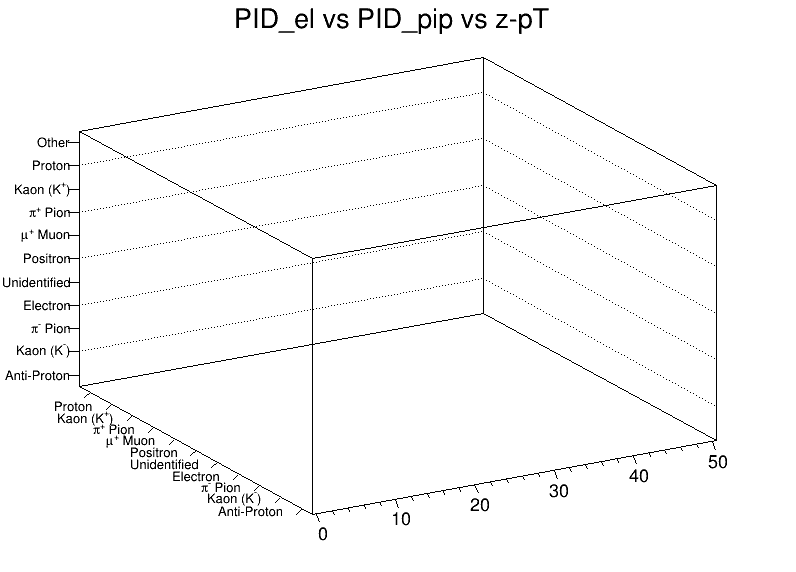

In [2]:
# import ROOT
# from ExtraAnalysisCodeValues import *

# # Initialize a histogram
# h2 = ROOT.TH3I("h2", "PID_el vs PID_pip vs z-pT", 51, -0.5, 50.5, 11, 0.5, 11.5, 11, 0.5, 11.5)
# # def PID_Histo_Label(Histogram):
# #     # Define the mapping and the histogram setup in Python
# #     pid_map = {-2212: (1,  "Anti-Proton"),
# #                 -321: (2,  "Kaon (K^{-})"),
# #                 -211: (3,  "#pi^{-} Pion"),
# #                   11: (4,  "Electron"),
# #                    0: (5,  "Unidentified"),
# #                  -11: (6,  "Positron"),
# #                  -13: (7,  "#mu^{+} Muon"),
# #                  211: (8,  "#pi^{+} Pion"),
# #                  321: (9,  "Kaon (K^{+})"),
# #                 2212: (10, "Proton")}
# #     for pid, (idx, name) in pid_map.items():
# #         Histogram.GetXaxis().SetBinLabel(idx, name)
# #         Histogram.GetYaxis().SetBinLabel(idx, name)
# #     Histogram.GetXaxis().SetBinLabel(11, "Other")
# #     Histogram.GetYaxis().SetBinLabel(11, "Other")
# #     Histogram.GetXaxis().SetLabelSize(0.0375)
# #     Histogram.GetYaxis().SetLabelSize(0.0375)
    
# #     return Histogram


# h2 = PID_Histo_Label(h2)
# # Optionally draw the histogram to see the result
# c = ROOT.TCanvas("c", "PID Histogram", 800, 600)
# h2.Draw("lego")
# c.Draw()


In [5]:
ROOT

<module 'ROOT' from '/opt/root/lib/ROOT/__init__.py'>

In [6]:
datatype = "mdf_Small"
Run_Small = False
if("_Small" in str(datatype)):
    Run_Small = True
    datatype  = datatype.replace("_Small", "")
    print("Running reduced histogram options...")

List_of_Quantities_1D = ["Test"]
List_of_Quantities_2D = ["Test"]
if(Run_Small):
    List_of_Quantities_1D = []
    List_of_Quantities_2D = [[Q2_Binning, y_Binning], [z_Binning, pT_Binning], [["pipsec", -0.5, 7.5, 8], phi_t_Binning], [["esec", -0.5, 7.5, 8], phi_t_Binning]]
    
    
    
print(f"datatype              = {datatype}")
print(f"List_of_Quantities_1D = {List_of_Quantities_1D}")
print(f"List_of_Quantities_2D = {List_of_Quantities_2D}")
    


Running reduced histogram options...
datatype              = mdf
List_of_Quantities_1D = []
List_of_Quantities_2D = ['[Q2_Binning, y_Binning], [z_Binning, pT_Binning], [["pipsec", -0.5, 7.5, 8], phi_t_Binning], [["esec", -0.5, 7.5, 8], phi_t_Binning]']
